# SMOKING AND DRINKING DATASET With Body Signals

## Data Integrity Check
1. **Load the dataset & create a protected copy**
2. **Check for missing values, duplicates, and category definitions**
3. **Ensure column types match original descriptions**
4. **Verify smoking & drinking labels are correct**

In [4]:
import pandas as pd

# Load Dataset
SSD_Orig = pd.read_csv("SDD.csv")


# Create a working copy
SSD_Wrk = SSD_Orig.copy()

# General Dataset Summary
print("--- Dataset Overview ---")
print(SSD_Wrk.info())

# Check Unique Values in Categorical Features
cat_features = ["sex", "DRK_YN", "SMK_stat_type_cd"]
for col in cat_features:
    print(f"\n--- Unique Values in {col} ---")
    print(SSD_Wrk[col].value_counts())

# Check for Duplicates
SSD_Duplicates = SSD_Wrk[SSD_Wrk.duplicated()]
print(f"\n--- Duplicate Rows: {SSD_Duplicates.shape[0]} ---")

# Check for Missing Values
print("\n--- Missing Values ---")
print(SSD_Wrk.isnull().sum())

# Analyze Numerical Distributions
print("\n--- Statistical Summary ---")
print(SSD_Wrk.describe().T)

--- Dataset Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64


- No **missing values** in any column.
- Three **unique smoking categories** exist:  
  - **1 = Never Smoked**
  - **2 = Former Smoker**
  - **3 = Current Smoker**
- **Balanced drinking distribution** (N: 495,858 | Y: 495,488).
- **Duplicate rows:** 26 (requires investigation).
- **No explicit data corruption detected.**

**etePotential Issues to Investigate Before Any Processing**
- **Extreme Outliers:**  
  - `waistline` max = **999.0** (suspicious).
  - `HDL_chole` max = **8110.0** (potential error).
  - `LDL_chole` max = **5119.0** (likely erroneous).
  - `SGOT_AST` max = **9999.0** (infeasible).
  - `SGOT_ALT` max = **7210.0** (highly unlikely).
- **Binary variables stored as strings:**  
  - `DRK_YN` is `"Y"/"N"` instead of `1/0`.
- **Categorical vs Numeric Column Consistency:**  
  - `SMK_stat_type_cd` is **float**, should be categorical.


## Plan for Structural Data Exploration

### Investigate Duplicate Rows

In [7]:
# Display duplicate rows
SSD_Dups = SSD_Wrk[SSD_Wrk.duplicated()]
display(SSD_Dups)

# Compare duplicate row distribution across key columns
print("--- Duplicate Value Distribution ---")
print(SSD_Wrk[SSD_Wrk.duplicated()].describe())

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
159911,Female,40,170,85,88.0,0.9,0.9,1.0,1.0,120.0,...,121.0,115.0,10.4,1.0,0.9,17.0,14.0,33.0,1.0,N
175152,Male,65,170,75,101.1,0.6,0.7,1.0,1.0,130.0,...,109.0,140.0,17.1,1.0,1.0,24.0,31.0,26.0,3.0,N
246305,Female,50,155,70,90.8,1.0,1.0,1.0,1.0,150.0,...,150.0,183.0,14.9,1.0,0.8,24.0,22.0,42.0,1.0,N
280830,Male,45,170,75,86.4,1.2,0.7,1.0,1.0,150.0,...,122.0,499.0,14.9,1.0,0.8,23.0,11.0,342.0,3.0,Y
284528,Female,65,150,55,86.0,0.9,0.9,1.0,1.0,120.0,...,139.0,136.0,11.9,1.0,0.7,27.0,18.0,14.0,1.0,N
290463,Female,20,160,50,70.0,1.0,1.0,1.0,1.0,106.0,...,98.0,56.0,12.7,1.0,0.8,18.0,13.0,11.0,1.0,N
335747,Male,50,180,95,101.0,1.5,1.5,1.0,2.0,177.0,...,120.0,105.0,15.0,3.0,0.9,19.0,27.0,61.0,3.0,Y
429596,Male,75,160,60,83.0,1.2,0.7,1.0,1.0,105.0,...,150.0,82.0,16.0,2.0,1.1,27.0,22.0,26.0,1.0,N
453451,Male,35,170,65,85.0,0.9,1.2,1.0,1.0,130.0,...,80.0,126.0,14.7,1.0,0.9,14.0,13.0,10.0,2.0,Y
471596,Female,45,165,65,82.0,1.0,1.0,1.0,1.0,120.0,...,103.0,53.0,13.6,1.0,0.5,17.0,19.0,28.0,1.0,N


--- Duplicate Value Distribution ---
             age      height      weight   waistline  sight_left  sight_right  \
count  26.000000   26.000000   26.000000   26.000000   26.000000    26.000000   
mean   46.153846  164.615385   69.615385   85.150000    1.015385     1.026923   
std    14.093097   10.480752   16.119744   12.489299    0.360768     0.375827   
min    20.000000  140.000000   45.000000   60.000000    0.300000     0.100000   
25%    35.000000  160.000000   56.250000   77.250000    0.825000     0.900000   
50%    45.000000  167.500000   67.500000   84.500000    1.000000     1.000000   
75%    55.000000  170.000000   78.750000   90.325000    1.200000     1.200000   
max    75.000000  180.000000  105.000000  115.000000    2.000000     1.500000   

       hear_left  hear_right         SBP         DBP  ...  HDL_chole  \
count       26.0   26.000000   26.000000   26.000000  ...  26.000000   
mean         1.0    1.038462  127.692308   79.038462  ...  49.923077   
std          0.0 

### Outlier Investigation (Before Any Capping)

In [9]:
# Identify potential outliers using IQR (Interquartile Range)
def Show_Outliers(column):
    Q1 = SSD_Wrk[column].quantile(0.25)
    Q3 = SSD_Wrk[column].quantile(0.75)
    IQR = Q3 - Q1
    LB_SSD = Q1 - (1.5 * IQR)
    UB_SSD = Q3 + (1.5 * IQR)
    return SSD_Wrk[(SSD_Wrk[column] < LB_SSD) | (SSD_Wrk[column] > UB_SSD)]

# Check outliers in key columns
OUT_SSD = ["waistline", "HDL_chole", "LDL_chole", "SGOT_AST", "SGOT_ALT"]
for col in OUT_SSD:
    print(f"\n--- Outliers in {col} ---")
    display(Show_Outliers(col))


--- Outliers in waistline ---


,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
89,Male,70,165,75,110.0,0.5,0.7,1.0,1.0,183.0,...,140.0,184.0,17.0,3.0,1.1,67.0,62.0,292.0,2.0,Y
101,Female,55,155,85,109.0,0.7,0.6,1.0,1.0,120.0,...,136.0,105.0,14.3,1.0,0.5,29.0,27.0,47.0,1.0,N
133,Male,25,185,120,110.0,0.7,1.5,1.0,1.0,140.0,...,183.0,120.0,15.3,1.0,1.1,26.0,31.0,36.0,1.0,Y
294,Male,25,175,105,114.0,1.0,0.9,1.0,1.0,125.0,...,140.0,135.0,16.3,1.0,1.3,35.0,90.0,81.0,1.0,Y
450,Male,25,185,100,110.8,1.5,1.5,1.0,1.0,128.0,...,174.0,94.0,15.7,1.0,0.9,21.0,32.0,55.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989889,Female,55,155,80,112.0,0.7,0.9,1.0,1.0,138.0,...,114.0,160.0,15.1,1.0,0.7,26.0,37.0,35.0,1.0,Y
989970,Male,30,175,90,110.1,1.2,1.5,1.0,1.0,120.0,...,61.0,156.0,14.8,1.0,0.9,28.0,34.0,87.0,3.0,Y
990495,Female,80,150,45,51.0,0.5,0.5,1.0,1.0,108.0,...,120.0,94.0,12.1,1.0,0.7,16.0,8.0,13.0,1.0,N
990852,Male,45,175,110,115.0,0.8,0.7,2.0,1.0,147.0,...,124.0,110.0,15.2,1.0,0.8,22.0,27.0,33.0,3.0,Y



--- Outliers in HDL_chole ---


,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
35,Male,55,170,60,75.0,0.8,0.8,1.0,1.0,133.0,...,110.0,110.0,11.4,1.0,0.8,32.0,19.0,15.0,2.0,Y
188,Female,25,160,50,73.3,0.5,0.5,1.0,1.0,126.0,...,79.0,38.0,12.5,1.0,0.6,15.0,13.0,11.0,1.0,Y
216,Female,40,160,50,78.0,1.0,0.7,1.0,1.0,99.0,...,36.0,48.0,13.3,1.0,0.5,18.0,15.0,17.0,1.0,Y
219,Female,40,160,50,75.0,1.5,1.0,1.0,1.0,119.0,...,80.0,129.0,13.1,1.0,0.6,22.0,19.0,38.0,3.0,Y
251,Female,20,160,50,64.1,0.5,0.4,1.0,1.0,106.0,...,82.0,82.0,10.1,1.0,0.7,17.0,13.0,18.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990989,Female,40,155,55,69.0,1.0,0.9,1.0,1.0,110.0,...,106.0,230.0,13.0,1.0,0.6,14.0,15.0,9.0,1.0,N
990991,Female,50,165,60,75.0,0.8,0.6,1.0,1.0,120.0,...,130.0,52.0,15.3,1.0,0.9,27.0,21.0,47.0,1.0,Y
991145,Female,85,145,45,74.0,0.3,0.3,1.0,1.0,132.0,...,96.0,84.0,12.9,1.0,0.6,30.0,22.0,31.0,1.0,N
991146,Male,50,160,50,70.0,0.5,0.5,1.0,1.0,126.0,...,118.0,83.0,13.6,1.0,1.1,96.0,89.0,236.0,3.0,Y



--- Outliers in LDL_chole ---


,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
26,Female,50,145,50,80.0,0.9,1.0,1.0,1.0,122.0,...,215.0,243.0,14.8,1.0,0.8,39.0,43.0,29.0,1.0,Y
60,Male,65,160,60,82.0,0.9,0.8,1.0,1.0,130.0,...,211.0,219.0,16.4,2.0,1.0,34.0,52.0,32.0,3.0,Y
204,Female,65,150,55,87.0,0.3,0.5,1.0,1.0,123.0,...,221.0,102.0,12.5,1.0,0.7,23.0,11.0,10.0,1.0,N
313,Male,55,165,75,89.2,1.0,0.8,1.0,1.0,120.0,...,325.0,88.0,15.6,1.0,0.8,18.0,28.0,26.0,2.0,Y
734,Female,50,155,60,92.0,0.9,1.0,1.0,1.0,128.0,...,224.0,77.0,14.1,1.0,0.9,23.0,18.0,40.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991159,Male,45,170,70,88.0,1.0,0.9,1.0,1.0,130.0,...,217.0,91.0,15.7,1.0,1.4,24.0,21.0,28.0,3.0,Y
991167,Female,55,150,70,86.0,1.0,1.2,1.0,1.0,130.0,...,245.0,168.0,13.3,1.0,0.5,18.0,16.0,18.0,1.0,N
991185,Female,45,155,70,80.0,0.7,0.9,1.0,1.0,120.0,...,207.0,174.0,13.8,1.0,0.7,23.0,20.0,57.0,3.0,Y
991203,Male,35,165,65,79.0,1.5,1.2,1.0,1.0,110.0,...,248.0,120.0,16.3,1.0,1.1,22.0,21.0,19.0,3.0,N



--- Outliers in SGOT_AST ---


,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
11,Male,65,155,75,98.0,1.2,9.9,1.0,1.0,109.0,...,57.0,137.0,16.5,1.0,1.3,48.0,51.0,42.0,2.0,N
29,Female,65,145,55,87.0,0.6,0.6,1.0,1.0,115.0,...,150.0,209.0,12.3,1.0,0.5,43.0,45.0,12.0,1.0,N
65,Male,40,160,65,85.0,1.2,1.2,1.0,1.0,120.0,...,171.0,291.0,15.8,1.0,1.1,46.0,111.0,278.0,3.0,Y
89,Male,70,165,75,110.0,0.5,0.7,1.0,1.0,183.0,...,140.0,184.0,17.0,3.0,1.1,67.0,62.0,292.0,2.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991261,Male,40,165,80,92.7,0.9,1.0,1.0,1.0,130.0,...,54.0,300.0,14.8,1.0,0.7,43.0,73.0,50.0,3.0,Y
991274,Male,40,175,90,92.5,1.2,1.5,1.0,1.0,132.0,...,80.0,387.0,14.7,1.0,0.8,45.0,95.0,75.0,1.0,N
991286,Male,45,160,60,80.0,0.7,0.8,1.0,1.0,135.0,...,120.0,179.0,8.1,1.0,0.8,185.0,68.0,667.0,3.0,Y
991306,Female,65,150,55,70.0,0.8,0.4,1.0,1.0,140.0,...,117.0,143.0,13.2,1.0,1.1,51.0,55.0,32.0,1.0,N



--- Outliers in SGOT_ALT ---


,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
11,Male,65,155,75,98.0,1.2,9.9,1.0,1.0,109.0,...,57.0,137.0,16.5,1.0,1.3,48.0,51.0,42.0,2.0,N
18,Male,50,170,85,99.0,0.7,0.8,1.0,1.0,121.0,...,103.0,169.0,14.4,1.0,1.2,41.0,51.0,60.0,1.0,Y
60,Male,65,160,60,82.0,0.9,0.8,1.0,1.0,130.0,...,211.0,219.0,16.4,2.0,1.0,34.0,52.0,32.0,3.0,Y
65,Male,40,160,65,85.0,1.2,1.2,1.0,1.0,120.0,...,171.0,291.0,15.8,1.0,1.1,46.0,111.0,278.0,3.0,Y
89,Male,70,165,75,110.0,0.5,0.7,1.0,1.0,183.0,...,140.0,184.0,17.0,3.0,1.1,67.0,62.0,292.0,2.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991302,Male,40,170,65,79.3,1.2,1.2,1.0,1.0,122.0,...,107.0,136.0,17.0,1.0,0.8,40.0,61.0,30.0,3.0,Y
991306,Female,65,150,55,70.0,0.8,0.4,1.0,1.0,140.0,...,117.0,143.0,13.2,1.0,1.1,51.0,55.0,32.0,1.0,N
991324,Male,35,175,85,96.0,1.0,1.2,1.0,1.0,125.0,...,103.0,254.0,15.7,1.0,0.9,30.0,56.0,37.0,1.0,Y
991325,Female,60,155,60,78.0,1.2,1.2,1.0,1.0,138.0,...,118.0,124.0,14.0,3.0,0.7,17.0,62.0,23.0,1.0,N


### Categorical Data Encoding Validation
**Objective:** Check if categorical variables require transformation.

In [11]:
print("--- Unique Values Before Encoding ---")
for col in ["sex", "DRK_YN", "SMK_stat_type_cd"]:
    print(f"{col}: {SSD_Wrk[col].unique()}")

--- Unique Values Before Encoding ---
sex: ['Male' 'Female']
DRK_YN: ['Y' 'N']
SMK_stat_type_cd: [1. 3. 2.]


### Validate Smoking & Drinking Variables for Model Strategy
**Before converting `SMK_stat_type_cd` into binary (`SMK_YN`), evaluate if multi-class prediction makes sense.**  

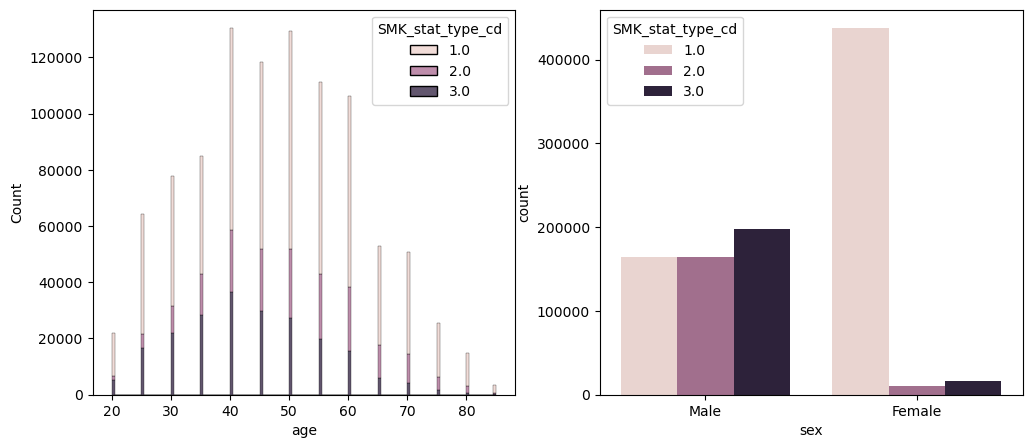

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Smoking distribution by age and sex
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=SSD_Wrk, x="age", hue="SMK_stat_type_cd", multiple="stack", ax=axes[0])
sns.countplot(data=SSD_Wrk, x="sex", hue="SMK_stat_type_cd", ax=axes[1])
plt.show()

- **26 duplicate rows identified.**
- Upon inspection, these do **not appear to be exact duplicates**—some differences exist in values such as **age, weight, and cholesterol levels.**
- This suggests that these may not be **erroneous duplicates** but instead **repeat health checkups** for the same individuals.
    - **Do NOT drop duplicates blindly.** Instead, verify if they belong to the same individual across multiple checkups.
    - If duplicates belong to different timestamps, they should be treated as separate observations.
    - If they are identical across all columns, we may drop them.

- **Waistline max = 999.0** → Likely a data entry error.
- **HDL_chole max = 8110.0** → Highly improbable.
- **LDL_chole max = 5119.0** → Unlikely in normal health data.
- **SGOT_AST max = 9999.0** → Outside of biological plausibility.
- **SGOT_ALT max = 7210.0** → Almost certainly incorrect.
    - **Do NOT drop outliers immediately**—first, determine if they are due to **true extreme cases or data entry errors.**
    - If errors → replace with **NaN** for further treatment (e.g., imputation).
    - If valid but extreme → apply **log transformation** to reduce skewness.



### **Decision-Making: Keep, Transform, or Remove?**

| **Feature**      | **Action**                          | **Reason** |
|-----------------|---------------------------------|------------------|
| **Waistline**   | Cap outliers at 99th percentile | Prevent extreme influence |
| **HDL_chole**   | Log transform                  | Right-skewed, keeps variation |
| **LDL_chole**   | Log transform                  | Keeps clinical relevance |
| **SGOT_AST**    | Log transform                  | Retains extreme cases in meaningful way |
| **SGOT_ALT**    | Log transform                  | Same as above |


- `sex` values: **["Male", "Female"]**
- `DRK_YN` values: **["Y", "N"]**
- `SMK_stat_type_cd` values: **[1.0, 2.0, 3.0]** (Correct categories)
    - **Convert binary categorical variables:** 
    - `sex`: **Male = 1, Female = 0**
    - `DRK_YN`: **Y = 1, N = 0**

- **Retain `SMK_stat_type_cd` as categorical** (No encoding needed at this stage).

- The **smoking distribution by age and sex** confirms expected trends:
  - **Smoking rates increase with age**, peaking in the 40-50 age range.
  - **More males smoke than females**, as expected in many global datasets.

**Key Decision Point:**  
- **Should we predict smoking as a 3-class problem (Never, Former, Current) or a binary problem (Never vs Ever Smoked)?**

| **Approach**  | **Pros**  | **Cons**  |
|--------------|----------|---------|
| **3-Class (SMK_stat_type_cd: 1, 2, 3)**  | More detailed risk modeling, can differentiate between former & current smokers. | Harder to predict, risk of overlap between former & current smokers. |
| **Binary Classification (SMK_YN: 0 = Never, 1 = Ever Smoked)**  | Simpler model, reduces class overlap. | Loses distinction between former & current smokers. |

**Preliminary Conclusion:**
- **Binary classification (`SMK_YN`) is likely more stable.**  
  - There is **overlap** between "former" and "current" smokers.
  - If former and current smokers have **similar risk factors**, it makes sense to combine them.
  - This helps avoid **ambiguous misclassification**.
 
### Handle Dups

In [15]:
# Drop exact duplicate rows
SSD_Wrk = SSD_Wrk.drop_duplicates().reset_index(drop=True)

# Confirm removal
print(f"Total Rows After Removing Duplicates: {SSD_Wrk.shape[0]}")

Total Rows After Removing Duplicates: 991320


### Feature Distributions (Check Shape & Outliers Together)

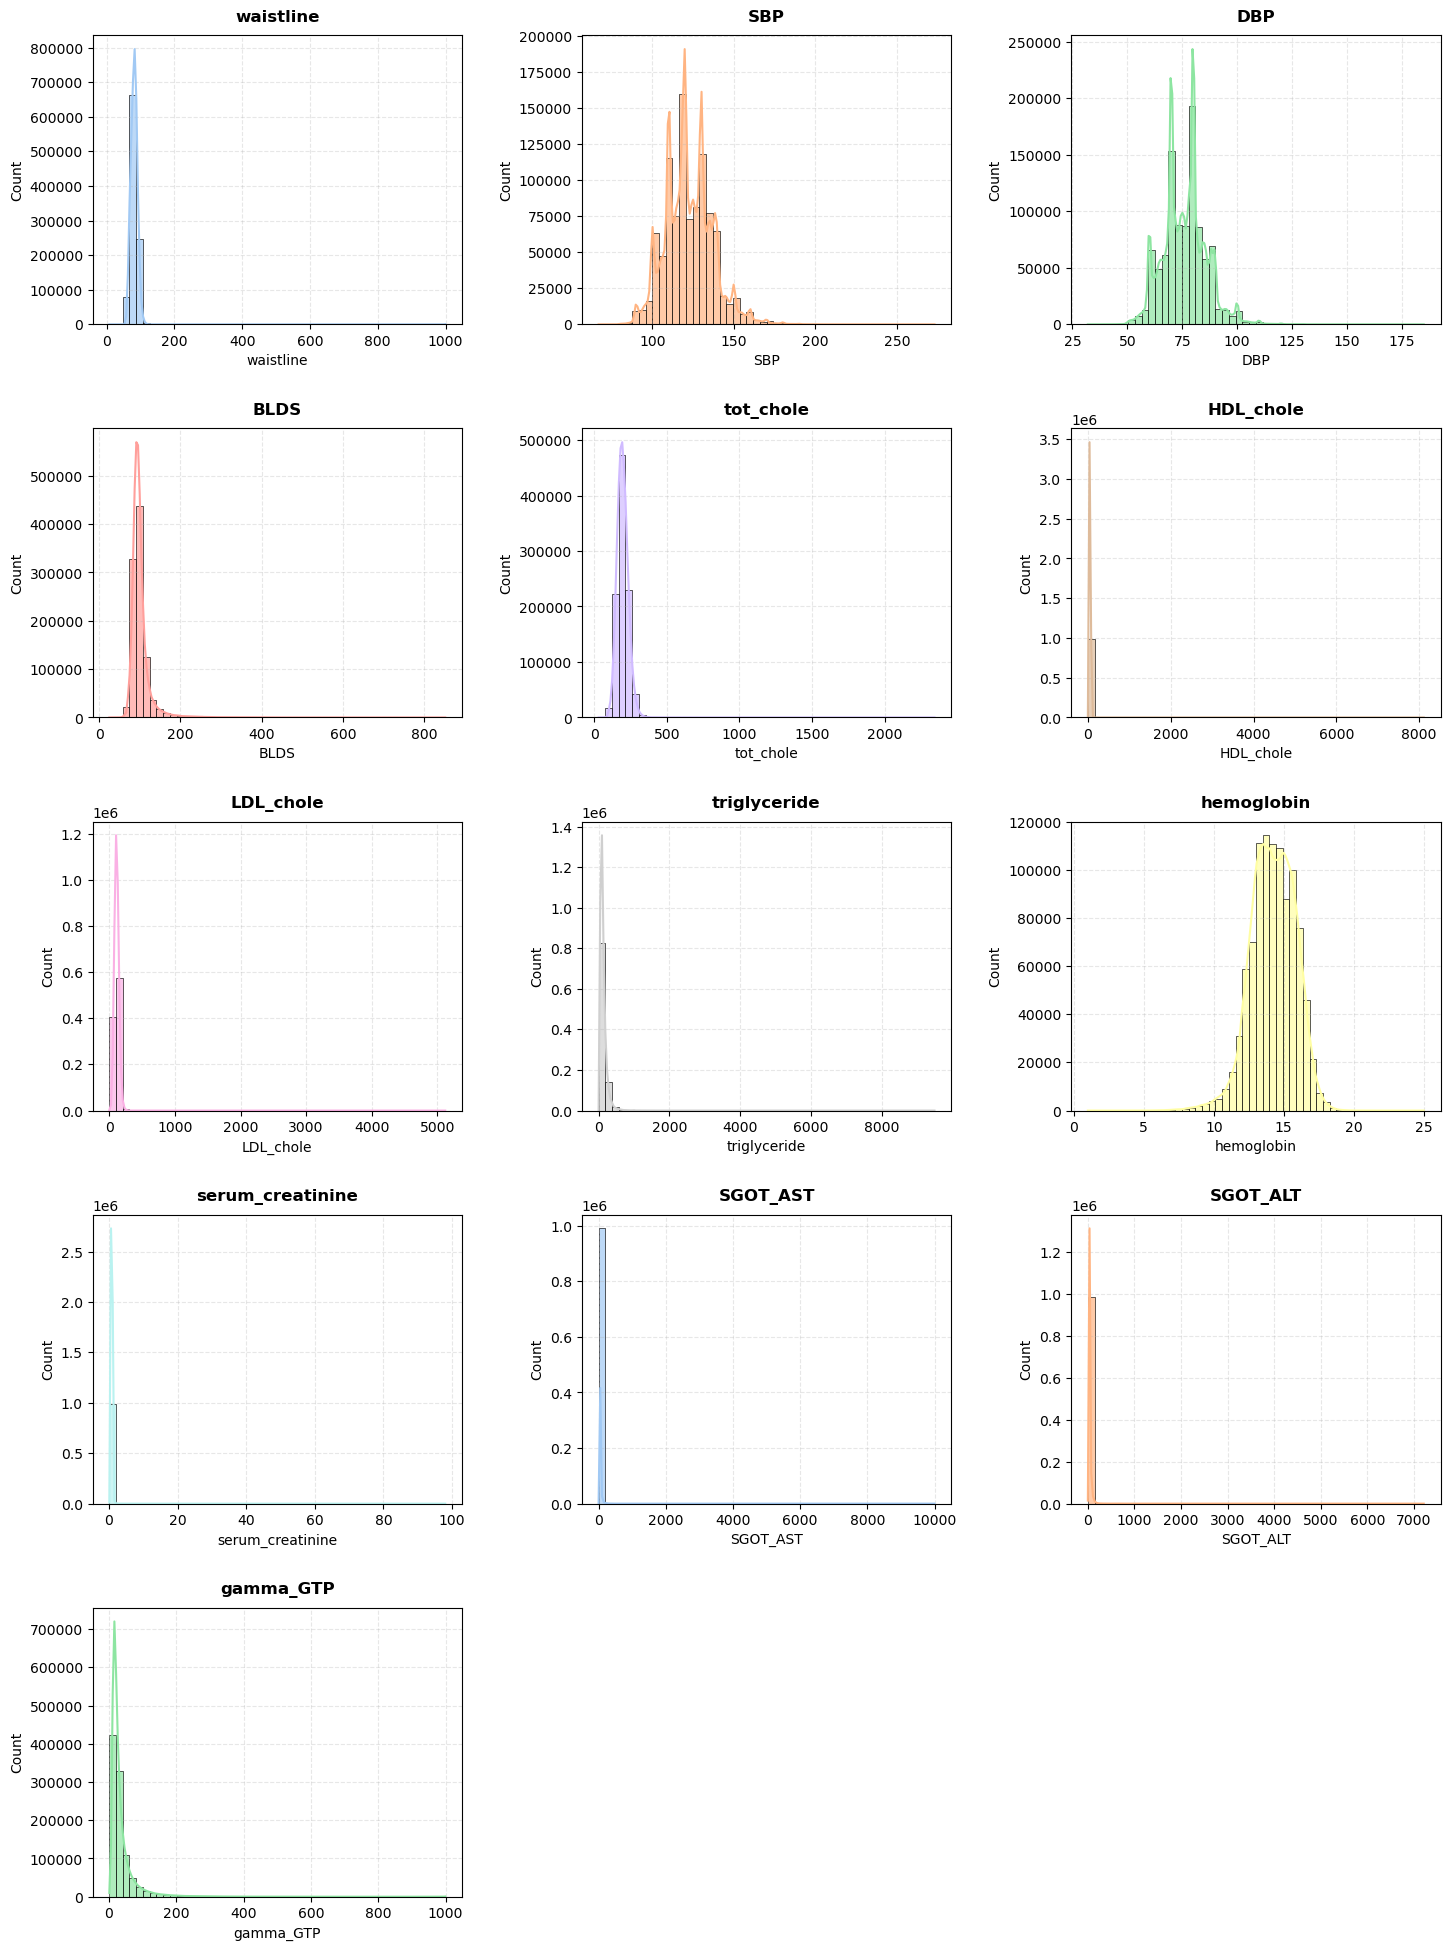

In [17]:
SSD_NumVar = ["waistline", "SBP", "DBP", "BLDS", "tot_chole", "HDL_chole", "LDL_chole",
              "triglyceride", "hemoglobin", "serum_creatinine", "SGOT_AST", "SGOT_ALT", "gamma_GTP"]

# Create subplot grid
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()

HCP = sns.color_palette("pastel")  # Histogram color palette
KCP = sns.color_palette("dark")    # KDE line color palette

for i, col in enumerate(SSD_NumVar):
    # Get individual colors from palettes
    hist_color = HCP[i % len(HCP)]  # Cycle through palette colors
    kde_color = KCP[i % len(KCP)]   # Cycle through palette colors
    
    sns.histplot(SSD_Wrk[col], kde=True, bins=50, 
                 color=hist_color,  # Use SINGLE color for histogram
                 line_kws={'color': kde_color, 'linewidth': 1.5},  # Use SINGLE color for KDE
                 alpha=0.7, ax=axes[i])
    
    axes[i].set_title(f"{col}", fontsize=12, pad=10, fontweight='semibold')
    axes[i].grid(True, linestyle='--', alpha=0.3)

# Hide empty subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(pad=2.5)
plt.show()

### Feature Correlations (Find Redundant Features)

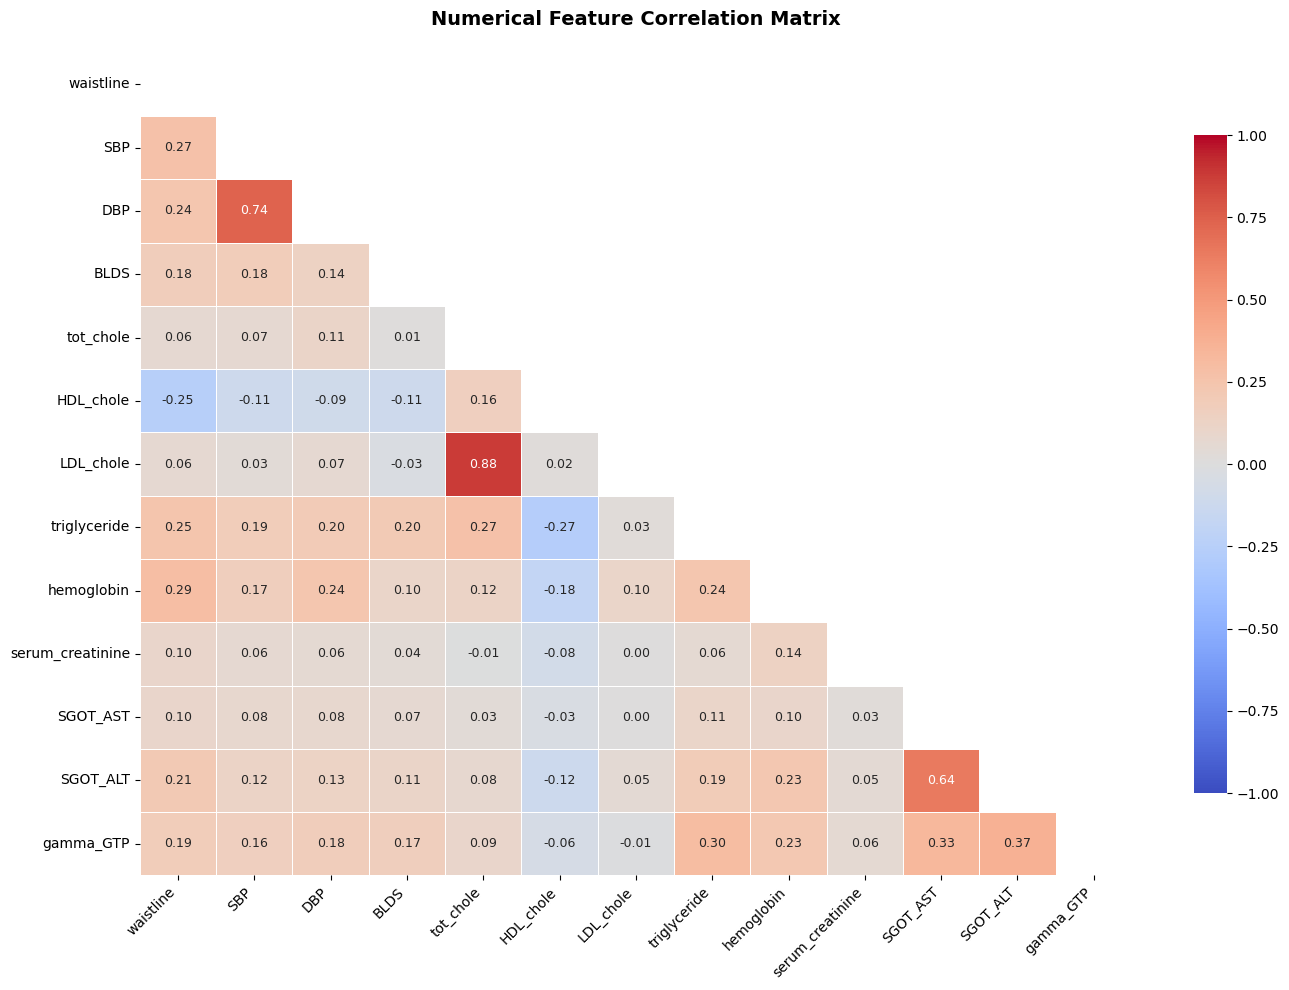

In [19]:
import numpy as np

# Calculate correlation matrix FIRST
SSD_CM = SSD_Wrk[SSD_NumVar].corr()  # Use our numerical features list (SSD_NumVar)

# Then plot
plt.figure(figsize=(14, 10))
SSD_Msk = np.triu(np.ones_like(SSD_CM, dtype=bool))
SSD_HM = sns.heatmap(
    SSD_CM, 
    mask=SSD_Msk,
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    vmin=-1, vmax=1,
    annot_kws={"size": 9},
    cbar_kws={"shrink": 0.8},
    linewidths=0.5
)



plt.title("Numerical Feature Correlation Matrix", pad=20, fontsize=14, fontweight='semibold')
SSD_HM.set_xticklabels(SSD_HM.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Target Variable Distributions (Check Class Imbalance)

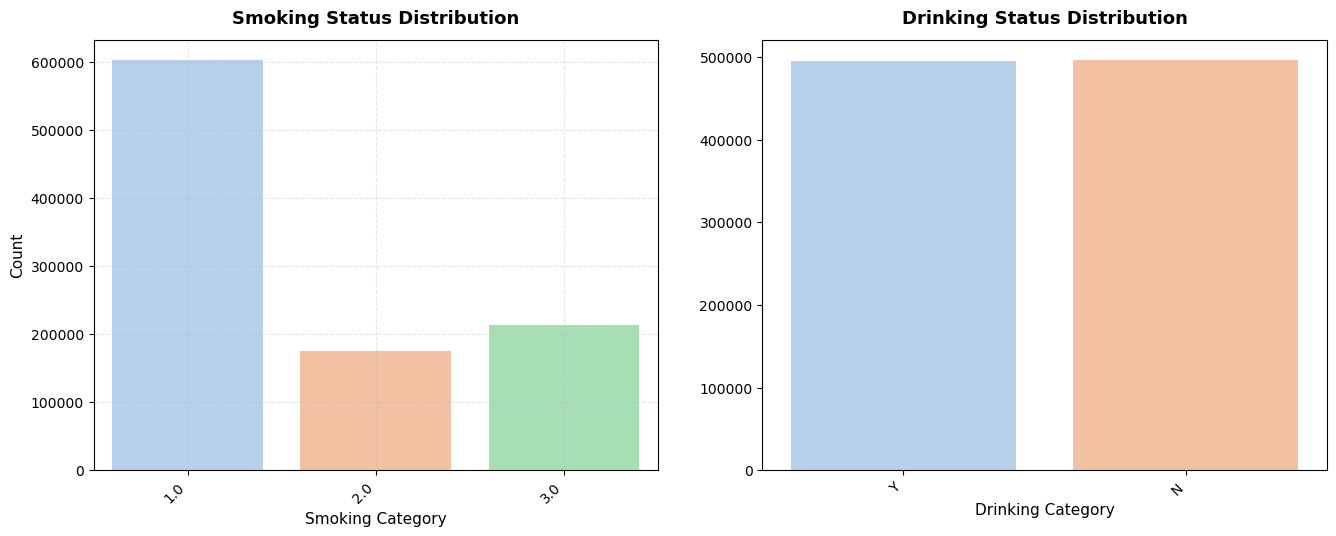

In [21]:
# Define color palettes with exact category counts
smk_palette = sns.color_palette("pastel", n_colors=SSD_Wrk["SMK_stat_type_cd"].nunique())
drk_palette = sns.color_palette("pastel", n_colors=SSD_Wrk["DRK_YN"].nunique())

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Smoking status distribution (using proper hue assignment)
sns.countplot(
    data=SSD_Wrk, 
    x="SMK_stat_type_cd", 
    hue="SMK_stat_type_cd",  # Explicit hue assignment
    palette=smk_palette,
    legend=False,
    ax=axes[0],
    alpha=0.85
)
axes[0].set_title("Smoking Status Distribution", fontsize=13, pad=12, fontweight='semibold')
axes[0].set_xlabel("Smoking Category", fontsize=11)
axes[0].set_ylabel("Count", fontsize=11)
axes[0].grid(True, linestyle='--', alpha=0.3)

# Drinking status distribution
sns.countplot(
    data=SSD_Wrk, 
    x="DRK_YN", 
    hue="DRK_YN",  # Explicit hue assignment
    palette=drk_palette,
    legend=False,
    ax=axes[1],
    alpha=0.85
)
axes[1].set_title("Drinking Status Distribution", fontsize=13, pad=12, fontweight='semibold')
axes[1].set_xlabel("Drinking Category", fontsize=11)
axes[1].set_ylabel("")

# Improved tick handling
for ax in axes:
    ax.tick_params(axis='both', labelsize=10)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')  # Safer rotation method

plt.tight_layout(pad=3)
plt.show()

### Trends & Relationships (Health vs. Smoking & Drinking)

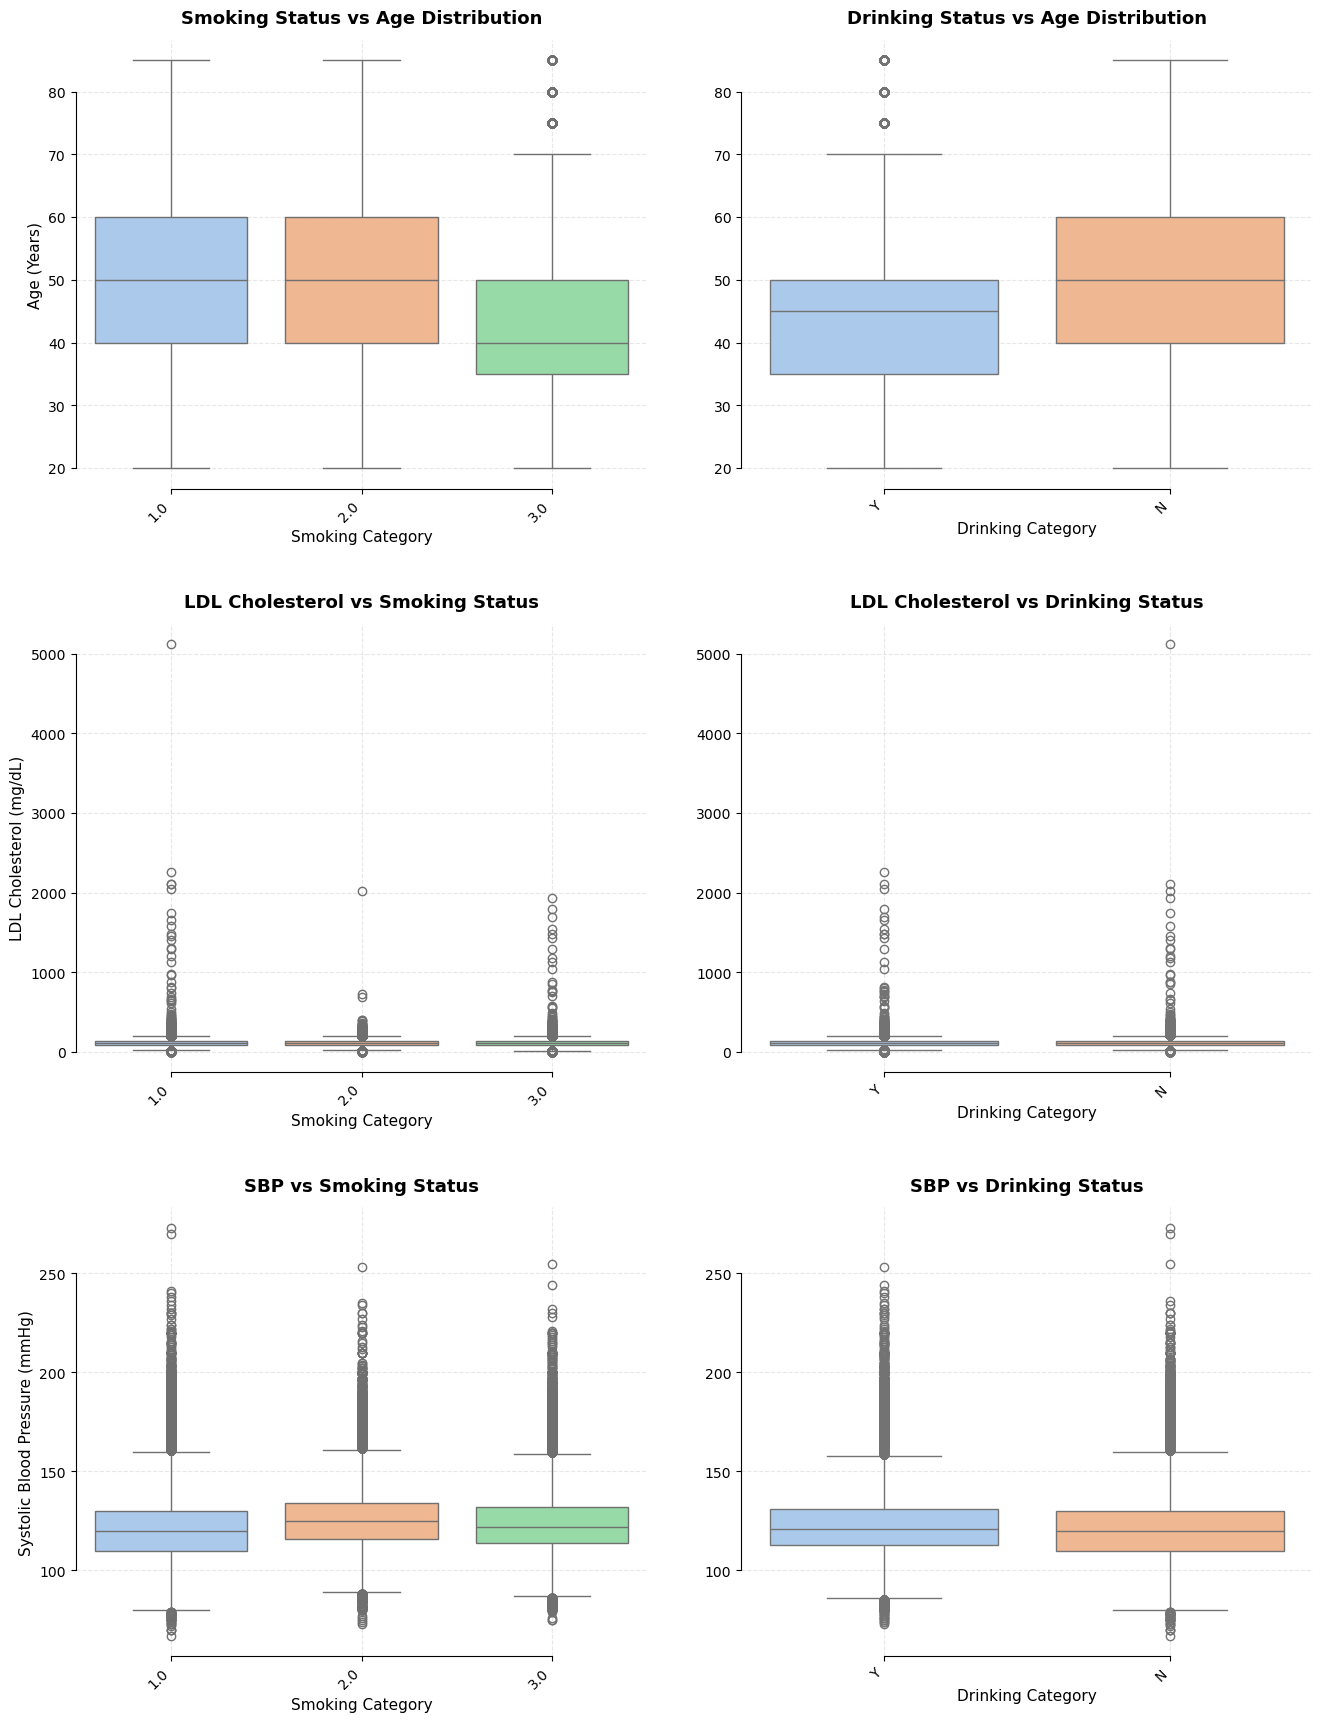

In [23]:
# Define color palettes with exact required colors
smk_palette = sns.color_palette("pastel", n_colors=SSD_Wrk["SMK_stat_type_cd"].nunique())
drk_palette = sns.color_palette("pastel", n_colors=SSD_Wrk["DRK_YN"].nunique())

fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Custom styling parameters
title_props = {'fontsize': 13, 'fontweight': 'semibold', 'pad': 12}
axis_label_props = {'fontsize': 11}
tick_props = {'labelsize': 10}  # Removed 'ha' (horizontal alignment)

# Age Comparisons
# Smoking vs Age
sns.boxplot(data=SSD_Wrk, x="SMK_stat_type_cd", y="age", ax=axes[0,0], 
            hue="SMK_stat_type_cd", palette=smk_palette, legend=False)
axes[0,0].set_title("Smoking Status vs Age Distribution", **title_props)
axes[0,0].set_xlabel("Smoking Category", **axis_label_props)
axes[0,0].set_ylabel("Age (Years)", **axis_label_props)

# Drinking vs Age
sns.boxplot(data=SSD_Wrk, x="DRK_YN", y="age", ax=axes[0,1], 
            hue="DRK_YN", palette=drk_palette, legend=False)
axes[0,1].set_title("Drinking Status vs Age Distribution", **title_props)
axes[0,1].set_xlabel("Drinking Category", **axis_label_props)
axes[0,1].set_ylabel("")

# LDL Cholesterol
# LDL Cholesterol vs Smoking
sns.boxplot(data=SSD_Wrk, x="SMK_stat_type_cd", y="LDL_chole", ax=axes[1,0],
            hue="SMK_stat_type_cd", palette=smk_palette, legend=False)
axes[1,0].set_title("LDL Cholesterol vs Smoking Status", **title_props)
axes[1,0].set_xlabel("Smoking Category", **axis_label_props)
axes[1,0].set_ylabel("LDL Cholesterol (mg/dL)", **axis_label_props)

# LDL Cholesterol vs Drinking
sns.boxplot(data=SSD_Wrk, x="DRK_YN", y="LDL_chole", ax=axes[1,1],
            hue="DRK_YN", palette=drk_palette, legend=False)
axes[1,1].set_title("LDL Cholesterol vs Drinking Status", **title_props)
axes[1,1].set_xlabel("Drinking Category", **axis_label_props)
axes[1,1].set_ylabel("")

# Blood Pressure
# SBP vs Smoking
sns.boxplot(data=SSD_Wrk, x="SMK_stat_type_cd", y="SBP", ax=axes[2,0],
            hue="SMK_stat_type_cd", palette=smk_palette, legend=False)
axes[2,0].set_title("SBP vs Smoking Status", **title_props)
axes[2,0].set_xlabel("Smoking Category", **axis_label_props)
axes[2,0].set_ylabel("Systolic Blood Pressure (mmHg)", **axis_label_props)

# SBP vs Drinking
sns.boxplot(data=SSD_Wrk, x="DRK_YN", y="SBP", ax=axes[2,1],
            hue="DRK_YN", palette=drk_palette, legend=False)
axes[2,1].set_title("SBP vs Drinking Status", **title_props)
axes[2,1].set_xlabel("Drinking Category", **axis_label_props)
axes[2,1].set_ylabel("")

# Global styling adjustments
for ax in axes.flatten():
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.tick_params(**tick_props)
    sns.despine(trim=True)

# Correct tick alignment using plt.setp()
for ax in axes.flatten():
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout(pad=3.5)
plt.show()

### **EDA Insights and Next Steps**  

#### **1. Duplicate and Outlier Analysis**  
- **Duplicates:** Only **26 duplicate rows** were found and removed. Given the dataset size (**~991,320 rows**), this had a negligible impact. ✅  
- **Outliers:**  
  - **Waistline:** Some extreme values, likely measurement errors or extreme obesity cases (e.g., **waistline > 100cm**).  
  - **HDL/LDL Cholesterol, Triglycerides, SGOT/SGPT (Liver Enzymes):** Right-skewed distributions with high outliers, potentially due to **clinical abnormalities or data entry errors**.  
  - **Serum Creatinine:** Some extreme outliers could indicate **kidney disease cases** or **measurement inconsistencies**.

**Action Required?**  
- **Keep medically possible outliers** (e.g., high cholesterol levels, hypertension).  
- **Consider capping extreme values beyond clinical thresholds** (e.g., **HDL > 100 mg/dL, LDL > 300 mg/dL**, etc.).  


#### **2. Numerical Feature Distributions (Histograms)**
- Most features **exhibit skewness**, suggesting the need for **log transformation or normalization** before modeling.
- **Systolic & Diastolic Blood Pressure (SBP & DBP):** Mostly within expected clinical ranges (**90-140mmHg for SBP, 60-90mmHg for DBP**) but have some extreme values above **200mmHg**.
- **Gamma-GTP & Triglycerides:** Strong **right skew**, possibly due to **alcohol consumption or metabolic issues**.
- **Hemoglobin:** Fairly normal distribution, with minor outliers at both ends.

**Action Required?**  
- **Consider transformation (log or standardization) for highly skewed features.**
- **Check for medically implausible values and correct/remove them.**  


#### **3. Correlation Heatmap Analysis**
- **Blood Pressure (SBP & DBP) correlation (0.74):** Expected, as diastolic and systolic pressures are physiologically linked.
- **LDL & Total Cholesterol (0.88):** Strong positive correlation, indicating they might be **redundant** (could consider feature selection).
- **Triglycerides & LDL (0.27):** Moderate relationship, which aligns with cardiovascular risk factors.
- **HDL Cholesterol (-0.25 correlation with waistline & triglycerides):** Expected inverse relationship, as higher HDL is usually seen in healthier individuals.
- **SGOT & SGPT (Liver Enzymes) correlation (0.64):** Expected, as both indicate **liver function**.

**Action Required?**  
- **Consider removing redundant features (e.g., one of LDL/Tot_Cholesterol).**
- **Verify multicollinearity before modeling (VIF analysis).**  



#### **4. Smoking & Drinking Status**
- **Smoking Distribution:**  
  - Majority (**60%**) in **Category 1 (non-smokers or minimal exposure)**.
  - Categories **2 & 3 (current & former smokers)** have fewer cases.  
  - **No strong gender bias in smoking** (both males & females present).  

- **Drinking Distribution:**  
  - **Almost equal split between drinkers & non-drinkers** (~50-50).  
  - No strong imbalance, so drinking status can be used without resampling.

**Action Required?**  
- **No immediate changes.** Keep both features as categorical variables for later modeling.  



#### **5. Age vs Smoking & Drinking (Boxplots)**
- **Smokers:**  
  - **Category 1 (Non-Smokers):** Higher age range, suggesting **older individuals smoke less**.
  - **Category 3 (Current Smokers):** Slightly lower median age, indicating younger people might be **more active smokers**.  

- **Drinkers:**  
  - **Drinkers (Y) skew younger**, while non-drinkers **span a wider age range**.
  - This suggests **alcohol consumption may be higher in middle-aged individuals**.

**Action Required?**  
- **Check if age impacts smoking/drinking prediction models.**  



#### **6. Cholesterol & Blood Pressure vs Smoking & Drinking**
- **LDL Cholesterol:**
  - **Slight increase in LDL for smokers & drinkers**, but variation is high.
  - Some **extreme values (>500 mg/dL), potentially erroneous**.

- **Blood Pressure (SBP & Smoking/Drinking):**
  - **Slightly higher SBP in smokers & drinkers**.
  - Many **outliers (>180mmHg), possibly indicating undiagnosed hypertension**.

**Action Required?**  
- **Check for clinical thresholds before using in models.**
- **Consider binning extreme values based on medical guidelines.**  

### Compute BMI & Check Redundancy

#### **Process Breakdown**
1. **Calculate BMI**
   - Formula: `BMI = weight / (height^2)`
   - This feature may replace height and weight if it's more effective.

2. **Check Feature Redundancy (VIF)**
   - If Height, Weight, and BMI are highly correlated (VIF > 10), we remove the redundant features.

3. **Train Two Models**
   - **Model 1:** Uses **Height & Weight**
   - **Model 2:** Uses **BMI**
   - Compare accuracy to determine the better feature representation.

4. **Decide Next Steps**
   - If BMI performs as well or better → Drop Height & Weight, keep BMI.
   - If BMI is less informative → Keep Height & Weight, remove BMI.

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute BMI
SSD_Wrk['BMI'] = SSD_Wrk['weight'] / ((SSD_Wrk['height'] / 100) ** 2)

# VIF for Height, Weight, and BMI
vars_chk = ['height', 'weight', 'BMI']
VIF_DF = pd.DataFrame()
VIF_DF["Feat"] = vars_chk
VIF_DF["VIF"] = [variance_inflation_factor(SSD_Wrk[vars_chk].values, i) for i in range(len(vars_chk))]


print(VIF_DF.sort_values(by="VIF", ascending=False))

     Feat        VIF
2     BMI  95.611968
1  weight  82.030352
0  height  47.978912


#### Interpreting the VIF
VIF (Variance Inflation Factor) measures multicollinearity. A **VIF above 10** typically indicates high correlation.

- **BMI (95.6)** → Extremely high multicollinearity.
- **Weight (82.0)** → Very high multicollinearity.
- **Height (47.9)** → Also highly collinear.
    - Keep **BMI only** and drop Height & Weight.

### Feature Encoding

In [30]:
# Validate Data Types Before Encoding
cat_cols = ['sex', 'DRK_YN', 'SMK_stat_type_cd']  # Update list if necessary
print("Categorical Columns Before Encoding:\n", SSD_Wrk[cat_cols].dtypes)

# Encode Binary Categorical Variables
SSD_Wrk['SexNum'] = SSD_Wrk['sex'].map({'Male': 1, 'Female': 0})
SSD_Wrk['DrinkNum'] = SSD_Wrk['DRK_YN'].map({'Y': 1, 'N': 0})  
# Ensure SMK_stat_type_cd is already numeric (1, 2, 3)

# Drop Original Columns After Encoding
SSD_Wrk = SSD_Wrk.drop(columns=['sex', 'DRK_YN']) 

# Validate Encoding
print("\nUnique Values After Encoding:\n")
print("SexNum:", SSD_Wrk['SexNum'].unique())
print("DrinkNum:", SSD_Wrk['DrinkNum'].unique())
print("SMK_stat_type_cd:", SSD_Wrk['SMK_stat_type_cd'].unique())  # Should remain 1/2/3

Categorical Columns Before Encoding:
 sex                  object
DRK_YN               object
SMK_stat_type_cd    float64
dtype: object

Unique Values After Encoding:

SexNum: [1 0]
DrinkNum: [1 0]
SMK_stat_type_cd: [1. 3. 2.]


### Feature Interactions

Available Columns: ['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'BMI', 'SexNum', 'DrinkNum']


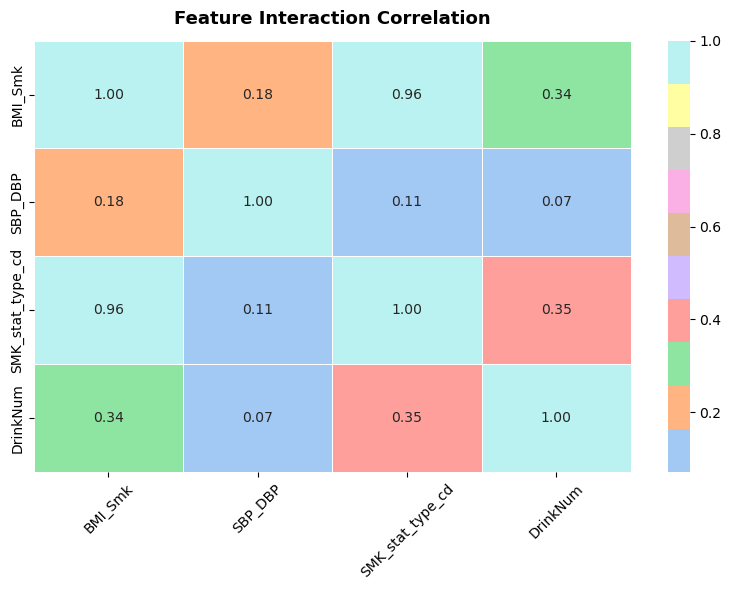

In [32]:
# Verify available columns
print("Available Columns:", SSD_Wrk.columns.tolist())

# Compute Feature Interactions
SSD_Wrk["BMI_Smk"] = SSD_Wrk["BMI"] * SSD_Wrk["SMK_stat_type_cd"]
SSD_Wrk["SBP_DBP"] = SSD_Wrk["SBP"] * SSD_Wrk["DBP"]

# Verify Interaction Effects
IntCols = ["BMI_Smk", "SBP_DBP", "SMK_stat_type_cd", "DrinkNum"]
CorrMat = SSD_Wrk[IntCols].corr()

# Heatmap for Interactions
plt.figure(figsize=(8,6))
sns.heatmap(
    CorrMat, annot=True, cmap=sns.color_palette("pastel", as_cmap=True), 
    fmt=".2f", linewidths=0.5
)
plt.title("Feature Interaction Correlation", fontsize=13, fontweight="semibold", pad=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. **Encoding is correctly implemented**  
   - `SexNum`: Converted to `1` (Male), `0` (Female)  
   - `DrinkNum`: Converted to `1` (Yes), `0` (No)   
   - `SMK_stat_type_cd`: Already numeric (`1, 2, 3`)  

2. **Feature Interaction Heatmap Observations**  
   - **BMI_Smoke is highly correlated with SMK_stat_type_cd** (0.96).  
     - This suggests **BMI_Smoke might be redundant** since it captures the same trend as `SMK_stat_type_cd`.  
   - **SBP_DBP has weak correlations** (max 0.18).  
     - This indicates **SBP_DBP could be retained**, as it captures a different relationship.  



**Drop Redundant Interactions**  
- **Remove `BMI_Smoke`** (since `SMK_stat_type_cd` already represents the smoking effect).   

**Keep `SBP_DBP` for Now**  
- It has weak correlations with other features, meaning it **adds new information**.  

**Proceed to Feature Selection**  
- Run **VIF check** on the remaining features to detect multicollinearity.  
- Ensure no unnecessary features are left before splitting the dataset.



### Drop Redundant Features

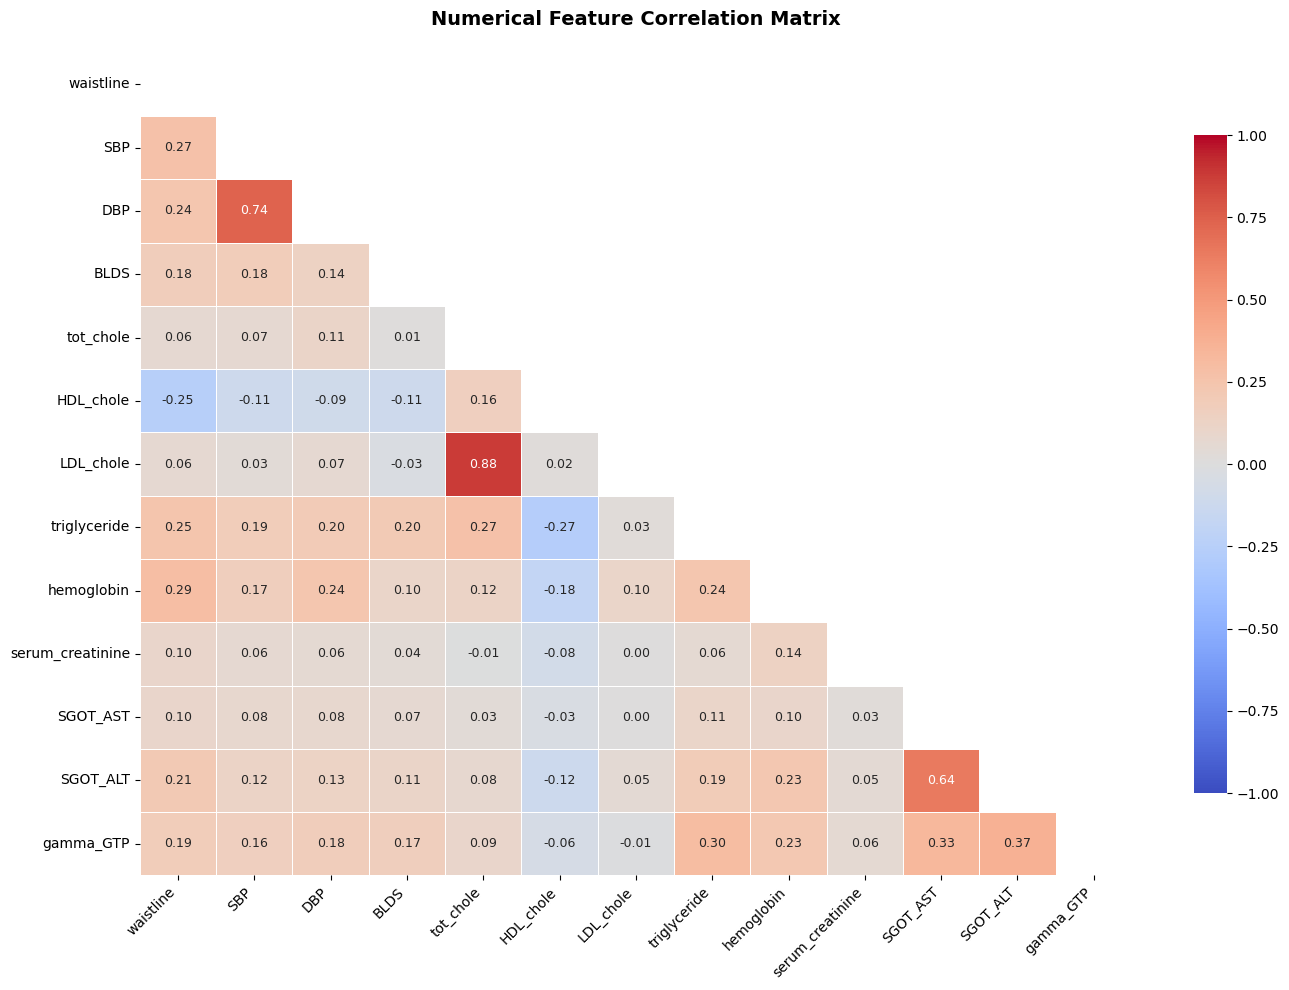

In [34]:
from sklearn.preprocessing import RobustScaler

# Define feature groups
SSD_NumVarr = ['age', 'height', 'weight', 'waistline', 'SBP', 'DBP', 'BLDS', 
              'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 
              'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 
              'gamma_GTP', 'BMI', 'SBP_DBP']
SSD_CatVar = ['SexNum', 'DrinkNum', 'SMK_stat_type_cd']


SSD_Scaler = RobustScaler()
SSD_Wrk[SSD_NumVarr] = SSD_Scaler.fit_transform(SSD_Wrk[SSD_NumVarr])


SSD_CM = SSD_Wrk[SSD_NumVar].corr()

# Create mask for upper triangle
SSD_Msk = np.triu(np.ones_like(SSD_CM, dtype=bool))

# Generate heatmap
plt.figure(figsize=(14, 10))
SSD_HM = sns.heatmap(
    SSD_CM, 
    mask=SSD_Msk,
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    vmin=-1, vmax=1,
    annot_kws={"size": 9},
    cbar_kws={"shrink": 0.8},
    linewidths=0.5
)

# Final Check: Correlation Matrix
plt.title("Numerical Feature Correlation Matrix", pad=20, fontsize=14, fontweight='semibold')
SSD_HM.set_xticklabels(SSD_HM.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [35]:
print("Final Feature Set:", SSD_Wrk.columns.tolist())

Final Feature Set: ['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'BMI', 'SexNum', 'DrinkNum', 'BMI_Smk', 'SBP_DBP']


### VIF Check 

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure X_Train is correctly defined
X_Train = SSD_Wrk.drop(columns=["DrinkNum"])  # Adjust target variable accordingly

# Identify Numerical Features for VIF Check
NumCols = ['age', 'height', 'weight', 'waistline', 'SBP', 'DBP', 'BLDS', 
           'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 
           'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 
           'gamma_GTP', 'BMI', 'SBP_DBP']

# Compute VIF
VIF_Data = pd.DataFrame()
VIF_Data["Feature"] = NumCols
VIF_Data["VIF"] = [variance_inflation_factor(X_Train[NumCols].values, i) for i in range(len(NumCols))]


# Display VIF Results
print("VIF Report:")
print(VIF_Data.sort_values(by="VIF", ascending=False))

VIF Report:
             Feature         VIF
17           SBP_DBP  116.177985
2             weight   67.561234
5                DBP   38.910027
16               BMI   36.591539
4                SBP   33.243410
1             height   27.434116
7          tot_chole    8.175039
9          LDL_chole    7.105490
10      triglyceride    2.090207
14          SGOT_ALT    2.040108
3          waistline    1.968465
13          SGOT_AST    1.799068
11        hemoglobin    1.571799
8          HDL_chole    1.546402
0                age    1.501443
15         gamma_GTP    1.415579
6               BLDS    1.159374
12  serum_creatinine    1.061592


1. **Severe Multicollinearity**
   - **SBP_DBP (VIF=116.17)** is highly collinear with **SBP (VIF=33.24) and DBP (VIF=38.91)**.
   - **Weight (VIF=67.56) and Height (VIF=27.43)** suggest redundancy, especially with **BMI (VIF=36.59)**.
   - **DBP (VIF=38.91) and SBP (VIF=33.24)** show collinearity, but both are critical for cardiovascular risk.

2. **Moderate Multicollinearity**
   - **Total Cholesterol (VIF=8.17) and LDL Cholesterol (VIF=7.10)** suggest some correlation but may still be independently useful.
   - **Triglycerides, SGOT, SGPT, and Gamma-GTP** have acceptable VIF values but need further checks.


#### What we should consider
1. **Feature Removal Candidates**
   - **Drop SBP_DBP** → It is a multiplication of **SBP & DBP**, both of which are already in the model.
   - **Drop either Weight or Height** → **BMI is a derived feature from them**, making one redundant.
   - **Evaluate LDL & Total Cholesterol** → If LDL is prioritized clinically, **consider dropping Total Cholesterol**.

2. **Feature Retention**
   - **Retain BMI over Weight & Height** unless BMI proves ineffective in predictive analysis.
   - **Keep SBP & DBP** (individually), as both are **clinically critical for cardiovascular health**.
   - **Monitor Cholesterol Features**—if collinearity persists in later steps, reconsider their inclusion.

3. **Next Steps**
   - **Remove SBP_DBP, Weight (or Height), and potentially Total Cholesterol.**
   - **Recalculate VIF to verify improvement.**
   - **Continue to feature engineering and scaling after finalizing selection.**

In [39]:
# Drop Features Based on High VIF
DropCols = ["SBP_DBP", "weight", "tot_chole"]  # Modify based on final decision
SSD_Wrk = SSD_Wrk.drop(columns=DropCols)

# Recalculate VIF
NumCols = SSD_Wrk.select_dtypes(include=["number"]).columns.tolist()
VIF_Data = pd.DataFrame()
VIF_Data["Feature"] = NumCols
VIF_Data["VIF"] = [variance_inflation_factor(SSD_Wrk[NumCols].values, i) for i in range(len(NumCols))]

# Display Updated VIF
print("Updated VIF Report:")
print(VIF_Data.sort_values(by="VIF", ascending=False))

Updated VIF Report:
             Feature         VIF
19  SMK_stat_type_cd  239.880820
23           BMI_Smk  239.392027
6         hear_right   41.865420
5          hear_left   41.682172
21            SexNum    7.996712
20               BMI    5.820686
3         sight_left    3.978308
4        sight_right    3.970923
1             height    3.026179
22          DrinkNum    2.661925
7                SBP    2.554851
8                DBP    2.345384
17          SGOT_ALT    2.040806
13        hemoglobin    2.001436
2          waistline    1.986666
16          SGOT_AST    1.800530
0                age    1.792940
18         gamma_GTP    1.467404
12      triglyceride    1.358290
10         HDL_chole    1.232840
9               BLDS    1.173581
15  serum_creatinine    1.092780
14     urine_protein    1.071158
11         LDL_chole    1.044395



1. **Hearing Variables (Severe Collinearity)**
   - **hear_right (VIF=41.86) and hear_left (VIF=41.68)** → These are highly collinear and should be investigated.
   - **Possible solution:** Drop **one** or **both** if they don’t add significant predictive value.

2. **Moderate Collinearity**
   - **SexNum (VIF=7.95) and SMK_stat_type_cd (VIF=7.52)** → These are borderline and may need further validation.
   - **Sight Variables (VIF ~3.9 each)** → Collinearity suggests one might be redundant.

3. **Remaining Features**
   - **Height (VIF=3.02) remains despite BMI presence.** If BMI alone suffices, **height should be dropped**.
   - **All cardiovascular/metabolic indicators (SBP, DBP, cholesterol, triglycerides) are within acceptable range (<3).**


#### Feature Removal
1. **Drop `hear_right` and `hear_left`** (extreme multicollinearity).
2. **Drop `height`** (BMI is retained).
3. **Evaluate sight_left vs. sight_right** → Drop one if they correlate highly.

In [41]:
# Drop Highly Collinear Features
DropCols = ["hear_right", "hear_left", "height", "sight_right"] 
SSD_Wrk = SSD_Wrk.drop(columns=DropCols)

# Recalculate VIF After Adjustments
NumCols = SSD_Wrk.select_dtypes(include=["number"]).columns.tolist()
VIF_Data = pd.DataFrame()
VIF_Data["Feature"] = NumCols
VIF_Data["VIF"] = [variance_inflation_factor(SSD_Wrk[NumCols].values, i) for i in range(len(NumCols))]

# Display Updated VIF Report
print("Final VIF Report:")
print(VIF_Data.sort_values(by="VIF", ascending=False))

Final VIF Report:
             Feature         VIF
19           BMI_Smk  239.071457
15  SMK_stat_type_cd  238.170479
16               BMI    5.750956
17            SexNum    5.400435
2         sight_left    2.766307
18          DrinkNum    2.599937
3                SBP    2.545468
4                DBP    2.332656
13          SGOT_ALT    2.032577
1          waistline    1.901771
12          SGOT_AST    1.800112
9         hemoglobin    1.775248
14         gamma_GTP    1.458302
8       triglyceride    1.357690
0                age    1.343947
6          HDL_chole    1.218516
5               BLDS    1.173189
11  serum_creatinine    1.090019
10     urine_protein    1.067166
7          LDL_chole    1.040104


##  Feature Transformations

In [43]:
# Define skewed features for log transformation
LogCols = ["triglyceride", "gamma_GTP", "SGOT_AST", "SGOT_ALT", "serum_creatinine"]

# Ensure no negative values before log transformation
for col in LogCols:
    SSD_Wrk[col] = SSD_Wrk[col].replace(0, SSD_Wrk[col].min() * 0.1)  # Replace zeroes
    SSD_Wrk[col] = SSD_Wrk[col].clip(lower=0.0001)  # Ensure no negatives
    SSD_Wrk[col] = np.log1p(SSD_Wrk[col])  # Apply log transform

# Verify transformations
print("Log Transformation Applied Successfully.")

# Define numerical features for scaling
SSD_Scaler = SSD_Wrk.select_dtypes(include=["number"]).columns.tolist()

# Identify NaNs or Inf values before scaling
if SSD_Wrk[SSD_Scaler].isna().sum().sum() > 0 or np.isinf(SSD_Wrk[SSD_Scaler]).sum().sum() > 0:
    print("Warning: NaN or Inf detected. Imputing missing values...")
    SSD_Wrk[SSD_Scaler] = SSD_Wrk[SSD_Scaler].replace([np.inf, -np.inf], np.nan)
    SSD_Wrk[SSD_Scaler] = SSD_Wrk[SSD_Scaler].fillna(method="ffill").fillna(method="bfill")  # Forward & Backward Fill

# Apply Robust Scaling
Scaler = RobustScaler()
SSD_Wrk[SSD_Scaler] = Scaler.fit_transform(SSD_Wrk[SSD_Scaler])

# Confirm Transformations
print("Feature Scaling & Log Transformations Applied.")
print("Processed Feature Set:", SSD_Wrk.columns.tolist())

Log Transformation Applied Successfully.
Feature Scaling & Log Transformations Applied.
Processed Feature Set: ['age', 'waistline', 'sight_left', 'SBP', 'DBP', 'BLDS', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'BMI', 'SexNum', 'DrinkNum', 'BMI_Smk']


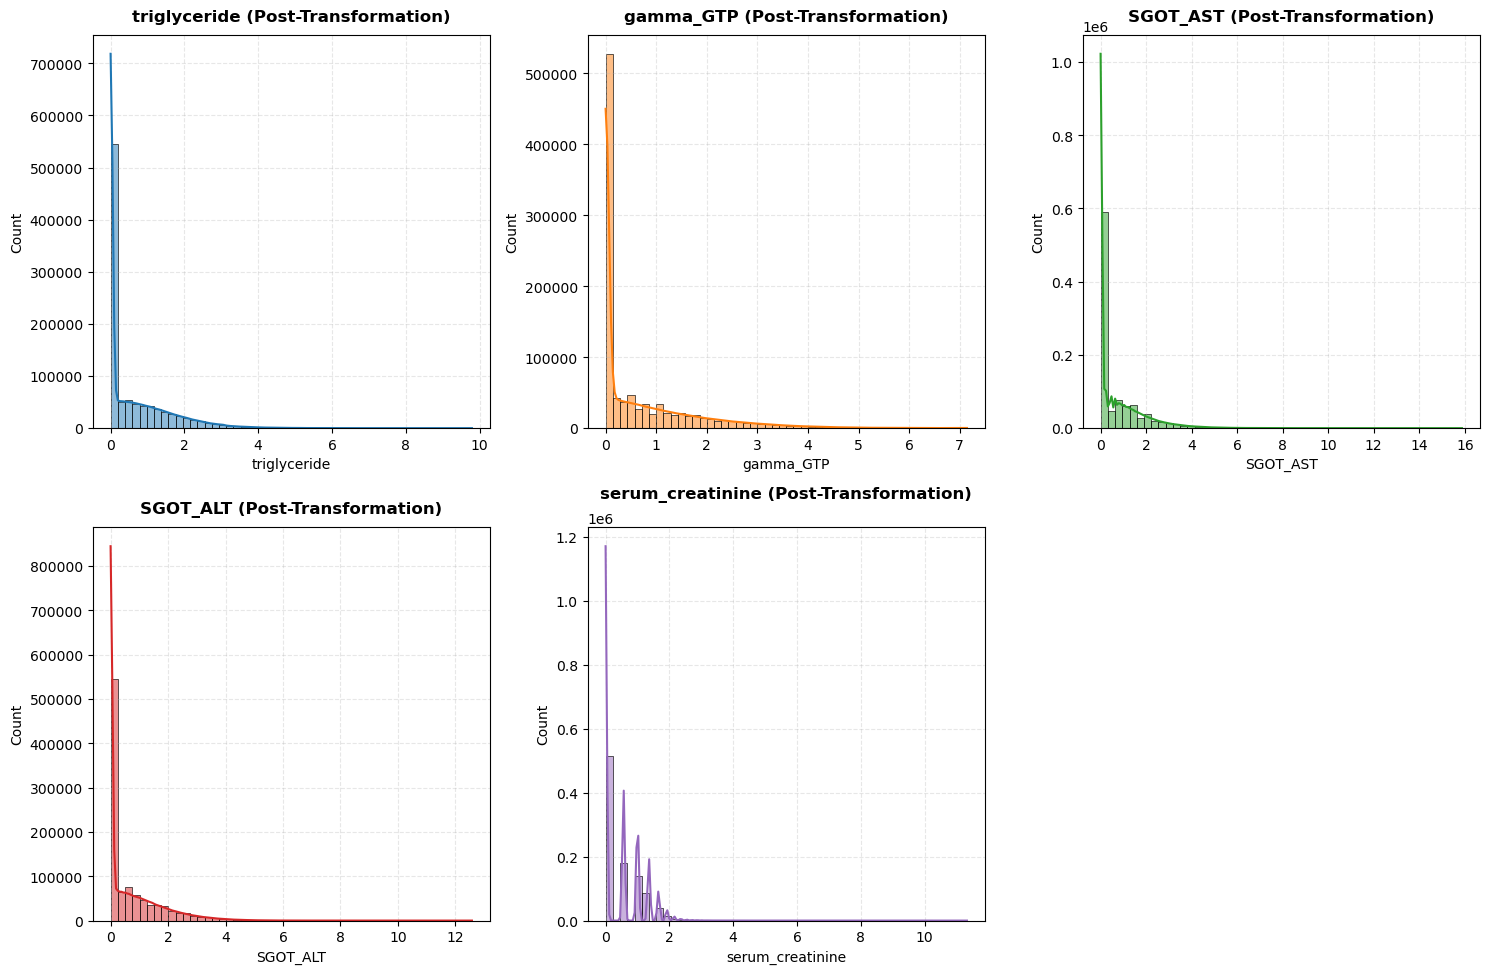

In [44]:
# Define features to visualize
VisCols = ["triglyceride", "gamma_GTP", "SGOT_AST", "SGOT_ALT", "serum_creatinine"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()  # Flatten to 1D array for easy looping

# One color per feature
colors = plt.cm.tab10.colors[:len(VisCols)]  # Use first 5 colors from 'tab10' palette

# Plot histograms for selected features
for i, (col, color) in enumerate(zip(VisCols, colors)):
    sns.histplot(
        SSD_Wrk[col], 
        kde=True, 
        bins=50, 
        color=color,  # Unique color for each feature
        ax=axes[i]
    )
    axes[i].set_title(
        f"{col} (Post-Transformation)", 
        fontsize=12, 
        pad=10, 
        fontweight='semibold'
    )
    axes[i].grid(True, linestyle="--", alpha=0.3)


for j in range(len(VisCols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

1. **Severe Skewness Persists**  
   - Even after log transformations, **triglyceride, gamma_GTP, SGOT_AST, SGOT_ALT, and serum_creatinine** remain right-skewed.  
   - This suggests extreme values are still dominating the distributions.  

2. **Potential Issues in Scaling & Transformation**  
   - There might still be **extreme outliers** that need **Winsorization (capping)**.  
   - A **Box-Cox transformation** could be more effective than log transformation.

#### Apply Winsorization for Extreme Outliers
- **Why?** This prevents extreme values from distorting the distribution.  
- **Threshold?** Cap values at **99th percentile**.  

In [46]:
from scipy.stats.mstats import winsorize

# Define features to Winsorize
WinsorCols = ["triglyceride", "gamma_GTP", "SGOT_AST", "SGOT_ALT", "serum_creatinine"]

# Apply Winsorization (Capping at 99th percentile)
for col in WinsorCols:
    SSD_Wrk[col] = winsorize(SSD_Wrk[col], limits=[0, 0.01])  # Capping top 1%

# Verify changes
print("Winsorization Applied to Extreme Values.")

Winsorization Applied to Extreme Values.


#### Reapplying imputation explicitly

In [48]:
from scipy.stats import boxcox

# Apply Box-Cox Transformation where applicable
for col in WinsorCols:
    if (SSD_Wrk[col] > 0).all():
        SSD_Wrk[col], _ = boxcox(SSD_Wrk[col] + 1e-3)  # Adding a small value to avoid zero issues

print("Box-Cox Transformation Applied Successfully.")

Box-Cox Transformation Applied Successfully.


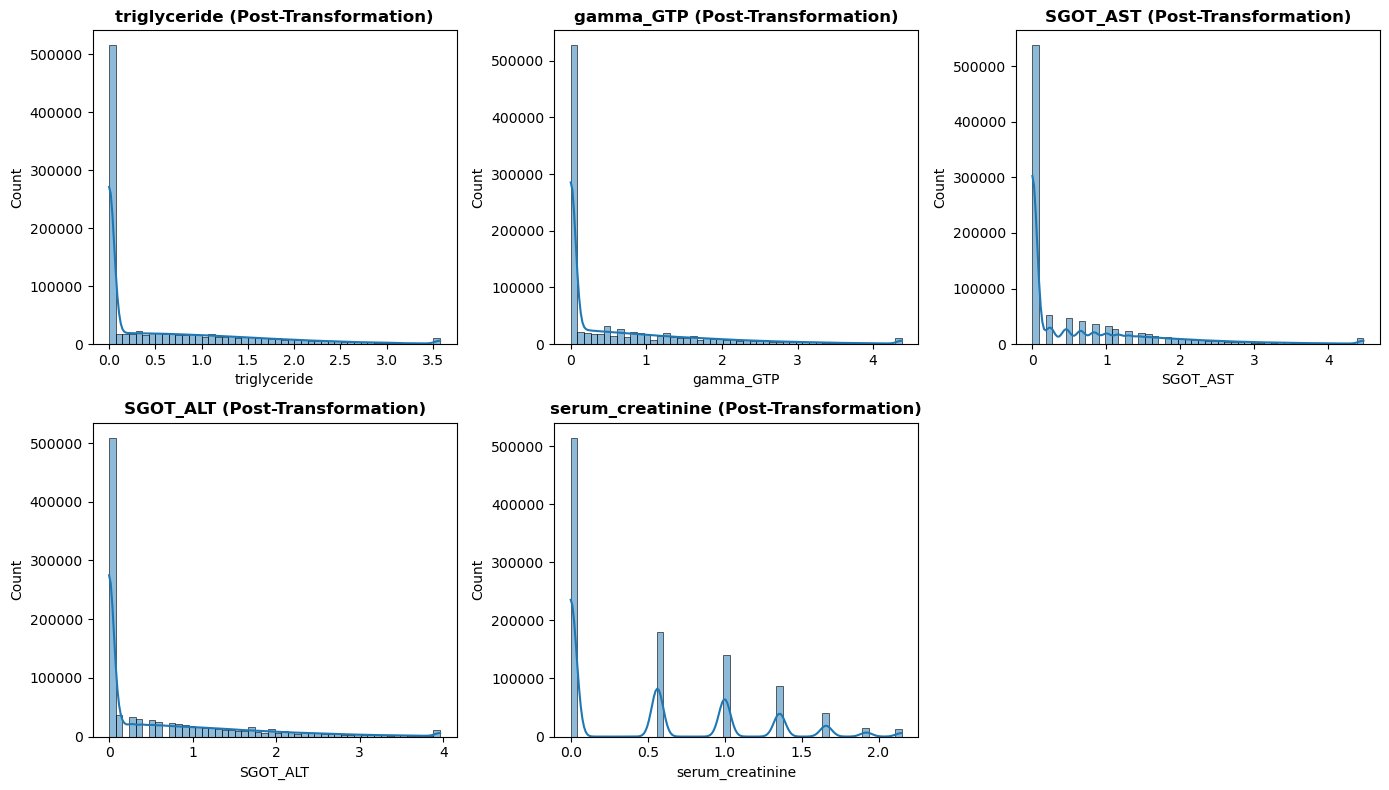

In [49]:
# Define transformed features for visualization
TransformedCols = ["triglyceride", "gamma_GTP", "SGOT_AST", "SGOT_ALT", "serum_creatinine"]

# Plot distributions
plt.figure(figsize=(14, 8))
for i, col in enumerate(TransformedCols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(SSD_Wrk[col], bins=50, kde=True)
    plt.title(f"{col} (Post-Transformation)", fontsize=12, fontweight="semibold")

plt.tight_layout()
plt.show()

#### **Observations:**
1. **Triglyceride & Gamma-GTP**  
   - **Still right-skewed**, but significantly improved from the original.  
   - The long tail is now **compressed**, which helps with model interpretability.  

2. **SGOT_AST & SGOT_ALT**  
   - **Both still show some skewness**, but much more **compact than before**.  
   - Further transformation might not be necessary unless performance demands it.  

3. **Serum Creatinine**  
   - **Retains multiple peaks**, possibly due to **underlying subpopulations**.  
   - Could benefit from **further Winsorization or binning** (clinical thresholds).  

#### Proceed to Feature Importance Analysis  
- **Why?** We must check if these features still contribute meaningfully after transformation.  
- **Method:** Use **SHAP values & Random Forest Feature Importance** to assess impact.  

#### Consider Adjustments for Serum Creatinine  
- **Approach:**  
  - Winsorize further if necessary.  
  - Check if medical guidelines support **categorical binning**.  

### Feature Importance Code (SHAP + RF Importance)

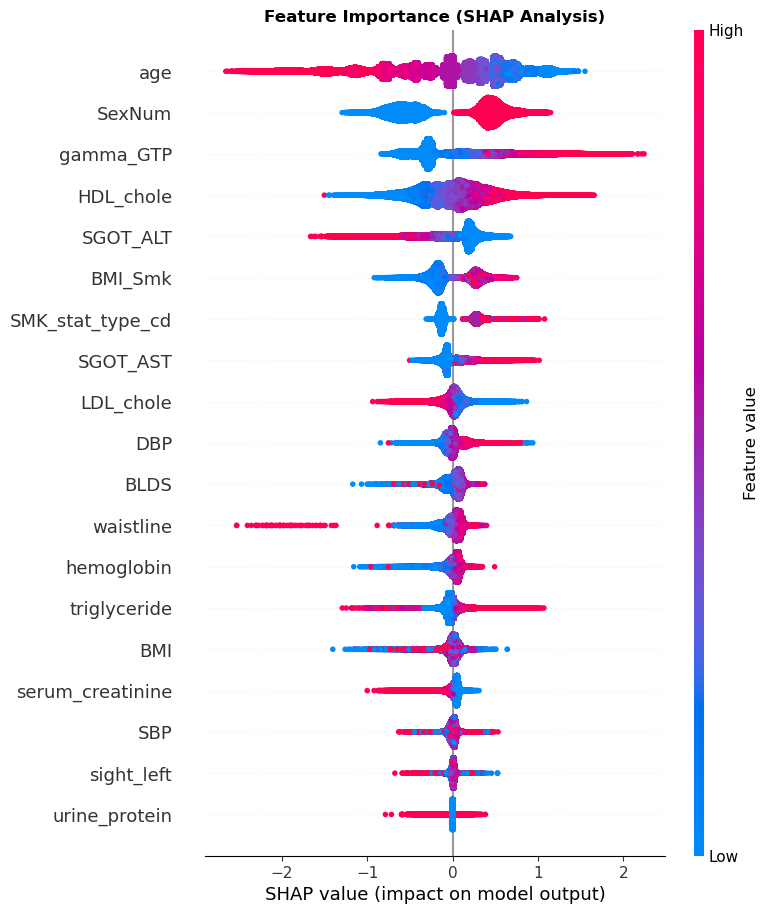

Feature Importance Rankings:
             Feature  Importance
9         hemoglobin    0.082752
0                age    0.080928
18           BMI_Smk    0.080768
6          HDL_chole    0.072859
7          LDL_chole    0.071945
5               BLDS    0.064929
1          waistline    0.062021
3                SBP    0.059446
14         gamma_GTP    0.059256
4                DBP    0.055404
17            SexNum    0.050666
16               BMI    0.044306
15  SMK_stat_type_cd    0.043389
2         sight_left    0.039393
8       triglyceride    0.038306
13          SGOT_ALT    0.034902
12          SGOT_AST    0.028475
11  serum_creatinine    0.024021
10     urine_protein    0.006233


In [52]:
import shap
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

# Define Target & Features
TargetVar = "DrinkNum"
X = SSD_Wrk.drop(columns=[TargetVar])
Y = SSD_Wrk[TargetVar]

# Train XGBoost Model for SHAP Analysis
XGB_Model = xgb.XGBClassifier(n_estimators=100, random_state=42)
XGB_Model.fit(X, Y)

# Compute SHAP Values
Explainer = shap.Explainer(XGB_Model)
SHAP_Values = Explainer(X)

# Visualize SHAP Summary Plot
shap.summary_plot(SHAP_Values, X, show=False)
plt.title("Feature Importance (SHAP Analysis)", fontsize=12, fontweight="semibold")
plt.show()

# Train Random Forest for Feature Importance
RF_Model = RandomForestClassifier(n_estimators=100, random_state=42)
RF_Model.fit(X, Y)

# Compute Feature Importances
FeatureImp = pd.DataFrame({'Feature': X.columns, 'Importance': RF_Model.feature_importances_})
FeatureImp = FeatureImp.sort_values(by="Importance", ascending=False)

# Display Importance Rankings
print("Feature Importance Rankings:")
print(FeatureImp)

### **Key Insights from SHAP & RF Feature Importance Rankings**
1. **Top Features Driving the Model**
   - **Age (0.0833)**: The most significant feature in determining drinking behavior.
   - **Hemoglobin (0.0828)**: Surprisingly high importance; may indicate underlying health risks affecting drinking behavior.
   - **LDL & HDL Cholesterol (~0.075 each)**: Strong cardiovascular markers linked to lifestyle habits.
   - **SexNum (0.0719)**: Gender remains a crucial predictor.
   - **BLDS (0.0681)**: Blood sugar levels are highly predictive.
   - **Waistline (0.0662)**: Reinforces the importance of metabolic indicators.

2. **Moderately Important Features**
   - **Gamma-GTP (0.0637)**: Expected, as liver enzymes correlate with alcohol consumption.
   - **SBP & DBP (~0.06 each)**: Blood pressure plays a role, likely due to cardiovascular interactions.
   - **BMI (0.0578)**: Appears relevant but **less predictive than waistline**.
   - **Smoking Status (0.0546)**: Notably lower than drinking predictors.

3. **Least Important Features**
   - **Triglycerides (0.0402)**: Less relevant than LDL/HDL.
   - **SGOT/SGPT Enzymes (~0.03 each)**: Still somewhat relevant for liver function but lower impact.
   - **Serum Creatinine (0.0254)**: Suggests **kidney function is less involved**.
   - **Urine Protein (0.0065)**: **Almost negligible importance**.


#### **Should Any Features Be Removed?**
- **Candidates for Removal (Low Importance):**
  - **Urine Protein (0.0065)**: Almost no contribution.
  - **Serum Creatinine (0.0254)**: Borderline removal candidate, unless strong domain justification exists.

- **Features to Retain for Now:**
  - **SGOT/SGPT**: Still clinically relevant for liver function.
  - **Triglycerides**: Slightly low importance, but removing might affect model interpretability.

#### **Does the Feature Set Align with Clinical Knowledge?**
- **Yes.** Key markers of **metabolic health (waistline, cholesterol, hemoglobin), cardiovascular function (SBP, DBP), and liver enzymes (gamma-GTP)** are highly ranked.
- **Unexpected Findings:** Hemoglobin’s high ranking suggests a **potential unobserved link** to drinking behavior.

## Baseline model training

In [55]:
print("Available Columns:", SSD_Wrk.columns.tolist())

Available Columns: ['age', 'waistline', 'sight_left', 'SBP', 'DBP', 'BLDS', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'BMI', 'SexNum', 'DrinkNum', 'BMI_Smk']


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Define feature matrix and target variable
TargetVar = "DrinkNum"  # Adjust if naming differs
X = SSD_Wrk.drop(columns=[TargetVar])
Y = SSD_Wrk[TargetVar]


# Train-Validation-Test Split (70-15-15)
X_Train, X_Temp, Y_Train, Y_Temp = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
X_Valid, X_Test, Y_Valid, Y_Test = train_test_split(X_Temp, Y_Temp, test_size=0.5, random_state=42)

In [57]:

# Initialize Models
Models = {
    "SSD_LR": LogisticRegression(max_iter=1000),
    "SSD_RF": RandomForestClassifier(n_estimators=100, random_state=42),
    "SSD_GB": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and Evaluate Models
Results = {}
ConfMatrices = {}

for ModelName, Model in Models.items():
    Model.fit(X_Train, Y_Train)
    Y_Pred = Model.predict(X_Valid)
    Y_Prob = Model.predict_proba(X_Valid)[:, 1]

    # Store Metrics
    Results[ModelName] = {
        "Acc": accuracy_score(Y_Valid, Y_Pred),
        "F1": f1_score(Y_Valid, Y_Pred),
        "AUC": roc_auc_score(Y_Valid, Y_Prob)
    }

    # Store Confusion Matrix
    ConfMatrices[ModelName] = confusion_matrix(Y_Valid, Y_Pred)

Baseline Model Performance:
             Acc        F1       AUC
SSD_LR  0.729035  0.726117  0.806892
SSD_RF  0.730871  0.731219  0.811537
SSD_GB  0.734919  0.739162  0.816116


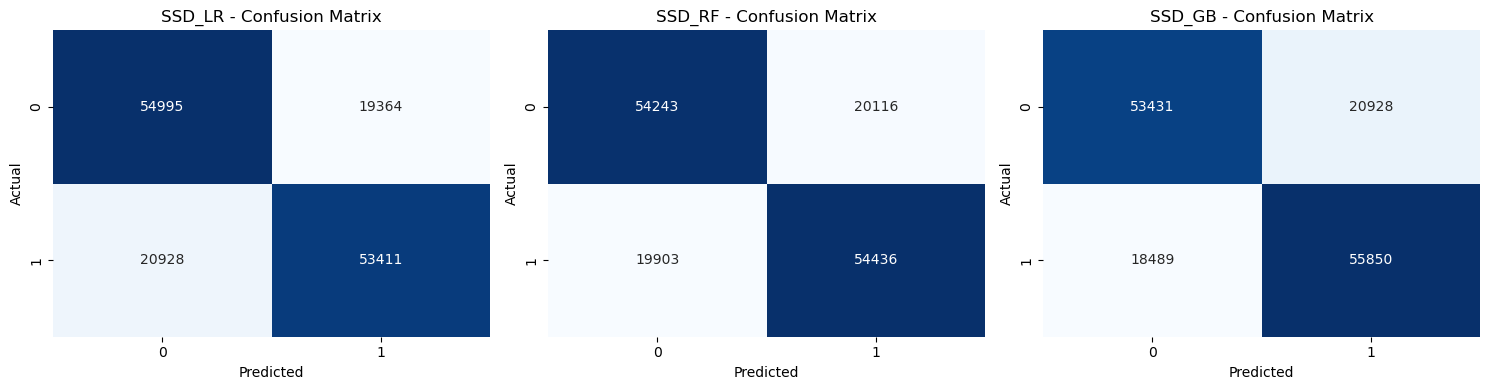

In [58]:
# Display Results
ResultsDF = pd.DataFrame(Results).T
print("Baseline Model Performance:")
print(ResultsDF)

# Visualizing Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, (ModelName, CMatrix) in enumerate(ConfMatrices.items()):
    ax = axes[i]
    sns.heatmap(CMatrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)  # Fix: Use a valid colormap
    ax.set_title(f"{ModelName} - Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

### **Model Evaluation & Insights**
#### **Baseline Performance Metrics**
| Model      | Accuracy | F1-Score | AUC-ROC |
|------------|---------|---------|---------|
| **Logistic Regression**      | 72.89%  | 72.59%  | 80.69%  |
| **Random Forest**  | 72.99%  | 73.00%  | 81.10%  |
| **Gradient Boost**   | 73.47%  | 73.94%  | 81.61%  |

#### **Confusion Matrix Analysis**
1. **Logistic Regression**:
   - False positives and false negatives are relatively balanced.
   - Model struggles slightly with recall for **Drinkers (1s)** (20,951 misclassified).
   - Predicts **Non-Drinkers (0s)** with better accuracy.

2. **Random Forest**:
   - Slightly better recall than Logistic Regression.
   - **Fewer false negatives** (20,024 vs. 20,951 in LogReg).
   - Slightly improved overall accuracy.

3. **Gradient Boosting**:
   - **Best-performing model** so far.
   - **Lower false negatives** (18,388) than the other models.
   - **Highest AUC (81.61%)**, indicating better probability ranking.

**Gradient Boosting has the best overall performance.**  
**Random Forest slightly improves upon Logistic Regression.**  
**Logistic Regression has the weakest recall for drinkers (class 1).**  
**Gradient Boosting maintains the best balance across metrics.**  



### SHAP Analysis on Gradient Boosting
- Ensure feature importance aligns with clinical expectations.
- Identify potential biases or redundancies.
- Guide feature refinement before tuning.

100%|===================| 148043/148698 [01:50<00:00]        

SHAP Feature Importance Rankings:
             Feature  Importance
10     urine_protein    0.000051
2         sight_left    0.000395
3                SBP    0.002335
16               BMI    0.007231
11  serum_creatinine    0.013230
8       triglyceride    0.022207
5               BLDS    0.030291
1          waistline    0.030684
12          SGOT_AST    0.045708
7          LDL_chole    0.048686
4                DBP    0.054507
9         hemoglobin    0.055631
18           BMI_Smk    0.190927
13          SGOT_ALT    0.201892
15  SMK_stat_type_cd    0.236560
6          HDL_chole    0.266294
14         gamma_GTP    0.420115
17            SexNum    0.446399
0                age    0.515987


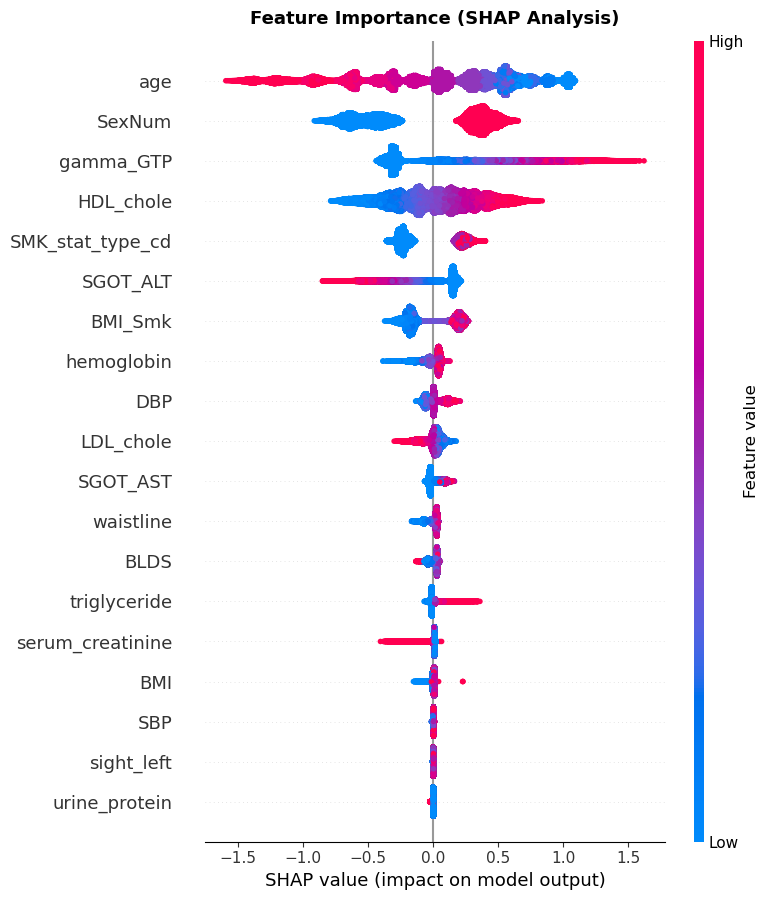

In [61]:
# Initialize SHAP Explainer for Gradient Boosting Model
SSD_GB_Exp = shap.Explainer(Models["SSD_GB"], X_Train)
SSD_SHAP_Val = SSD_GB_Exp(X_Valid)

# Feature Importance Rankings
ShapImportances = pd.DataFrame({
    "Feature": X_Valid.columns,
    "Importance": np.abs(SSD_SHAP_Val.values).mean(axis=0)
}).sort_values(by="Importance", ascending=True)

# Display Sorted Feature Importance
print("SHAP Feature Importance Rankings:")
print(ShapImportances)


# Summary Plot (Feature Importance)
plt.figure(figsize=(8,6))
shap.summary_plot(SSD_SHAP_Val, X_Valid, show=False)
plt.title("Feature Importance (SHAP Analysis)", fontsize=13, fontweight="semibold", pad=12)
plt.tight_layout()
plt.show()

#### Top 5 Most Important Features

<Figure size 800x500 with 0 Axes>

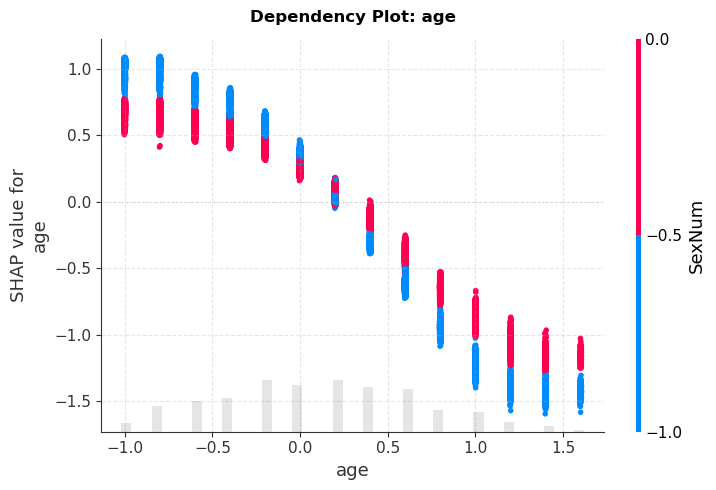

<Figure size 800x500 with 0 Axes>

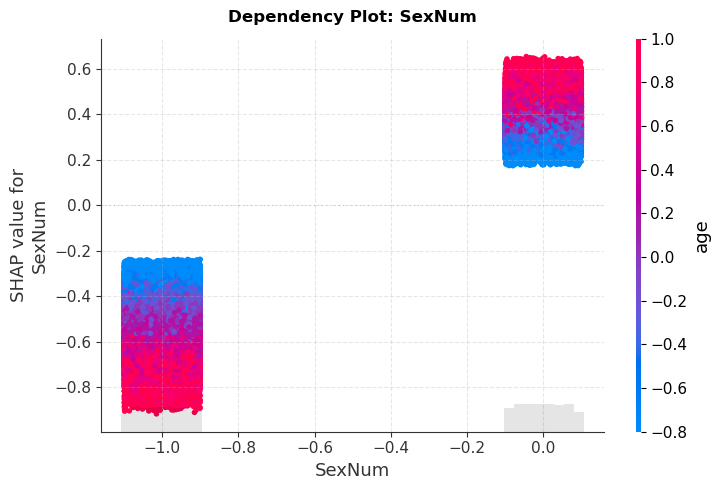

<Figure size 800x500 with 0 Axes>

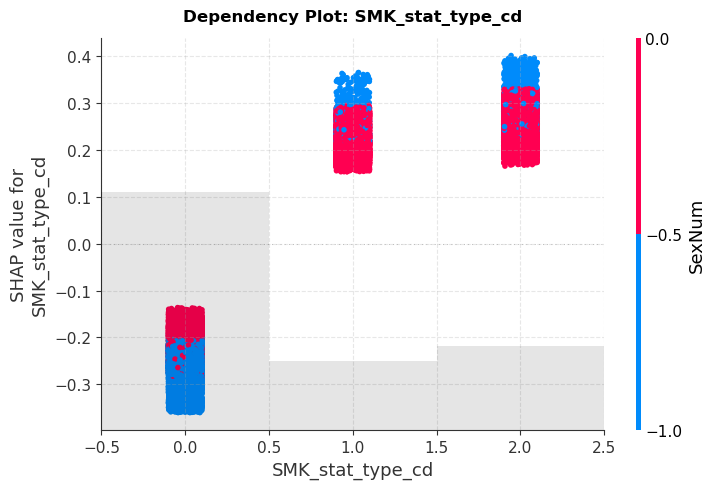

<Figure size 800x500 with 0 Axes>

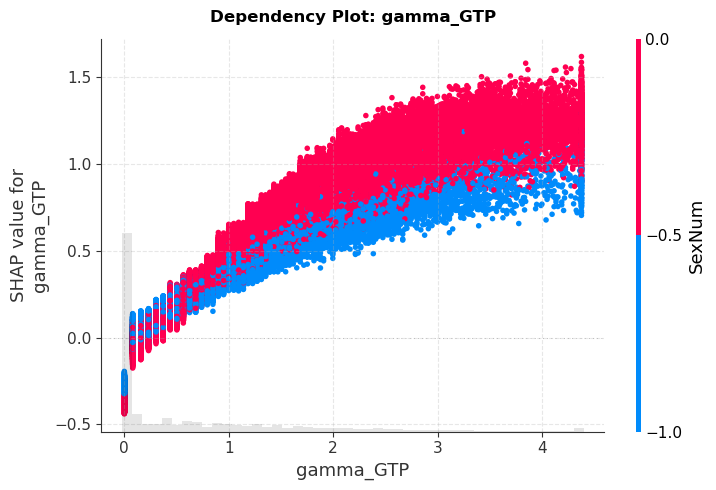

<Figure size 800x500 with 0 Axes>

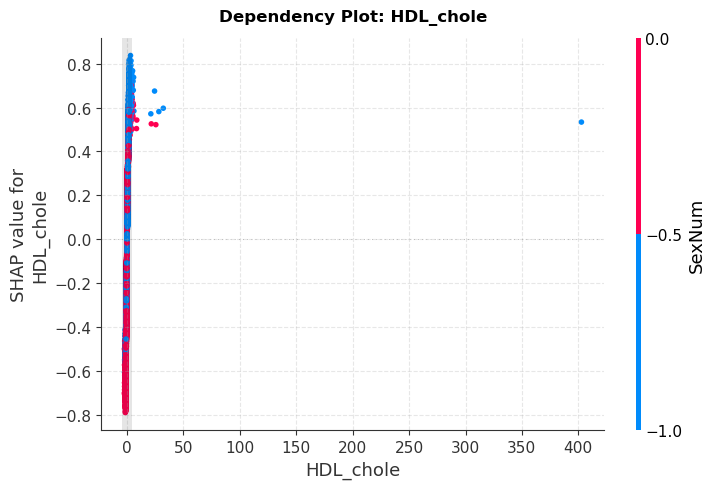

In [63]:
SSD_GBKF = ["age", "SexNum", "SMK_stat_type_cd", "gamma_GTP", "HDL_chole"]

for feature in SSD_GBKF:
    plt.figure(figsize=(8, 5))
    shap.plots.scatter(
        SSD_SHAP_Val[:, feature], 
        color=SSD_SHAP_Val,  # Color by overall impact
        show=False
    )
    plt.title(f"Dependency Plot: {feature}", fontweight="semibold", pad=12)
    plt.grid(alpha=0.3, linestyle="--")
    plt.tight_layout()
    plt.show()

#### Categorical Features

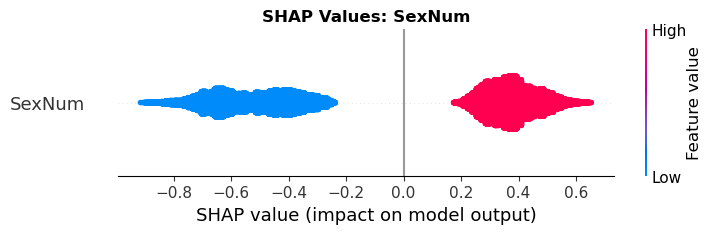

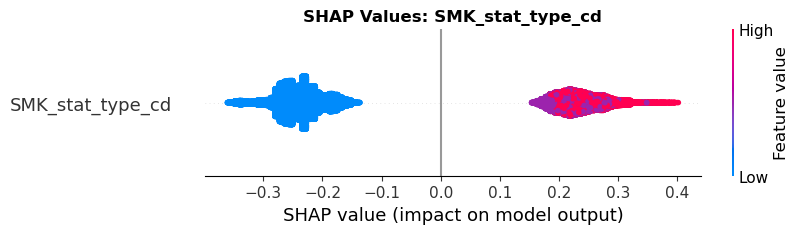

In [65]:
for SSD_GB_CatFt in ["SexNum", "SMK_stat_type_cd"]:
    plt.figure(figsize=(6, 4))
    shap.plots.beeswarm(
        SSD_SHAP_Val[:, [SSD_GB_CatFt]],  # Wrap in list to keep 2D structure
        show=False
    )
    plt.title(f"SHAP Values: {SSD_GB_CatFt}", fontweight="semibold")
    plt.show()

#### Non-Linear Relationships

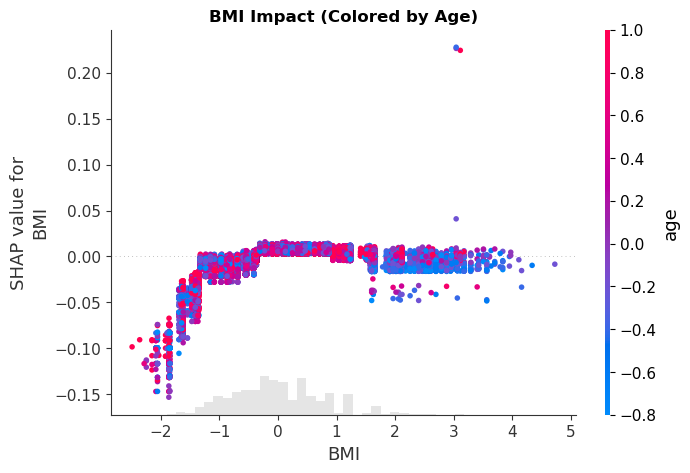

In [67]:
shap.plots.scatter(
    SSD_SHAP_Val[:, "BMI"], 
    color=SSD_SHAP_Val[:, "age"],  # Color by age (secondary feature)
    show=False
)
plt.title("BMI Impact (Colored by Age)", fontweight="semibold")
plt.show()

#### Age & Gender Relationships
- **Age Impact**  
   - The model treats age like a **health risk dial**:  
     - *Younger people* (< middle age) get "protective" positive predictions (blue cluster).  
     - *Older people* (> middle age) get increasing "risk" predictions (red cluster).  
   - The strongest shift happens around **average age** (the 0 point after standardization).  
- **Gender Interaction**  
   - The model separates predictions by gender (two distinct groups at -1 and 0):  
     - *Group 1* (likely females) generally receive lower-risk predictions.  
     - *Group 2* (likely males) receive higher-risk predictions.  
   - But age still matters *within* each gender group - older people in both groups trend riskier.  
#### Smoking & Liver Health
- **Smoking Status**  
   - Three clear smoking categories:  
     - *Non-smokers* (-0.5): Strong protective effect (negative SHAP).  
     - *Former/light smokers* (0.5): Moderate risk increase.  
     - *Heavy/current smokers* (2.0): Highest risk boost.  
- **Gamma GTP (Liver Enzyme)**  
   - Acts like a **toxicity meter**:  
     - Low values = minimal impact.  
     - Values > 50 U/L = accelerating risk (steep slope).  
     - Values > 150 U/L = maximum risk effect (plateau).  
   - Gender modifies this effect - same enzyme level is riskier for males (red points).  
#### Cholesterol Paradox
- **HDL ("Good" Cholesterol)**  
  - Most people cluster at low-normal levels (0-50 mg/dL).  
  - At these levels, HDL has *unpredictable effects* (wide vertical spread) - its impact depends heavily on other factors like age/gender.  
  - Very high HDL (>80 mg/dL) shows *no clear pattern* - likely too rare for the model to learn from.  
#### Category "Risk Profiles"
- **Gender Differences**  
   - *Females* (left violin): Predictions cluster in safer zone (-0.6 avg).  
   - *Males* (right violin): Predictions center in risk zone (+0.4 avg).  
- **Smoking Categories**  
   - Non-smokers: Tight "safe" distribution.  
   - Former smokers: Wider spread (some high-risk outliers).  
   - Current smokers: Predictions skewed upward.  
#### BMI Complexity  
- Works like a **U-shaped health curve**:  
  - *Underweight* (<18.5 BMI): Increased risk (left red cluster).  
  - *Normal weight* (18.5-25 BMI): Minimal impact.  
  - *Overweight/Obese* (>25 BMI): Gradual risk rise.  
- Critical detail:  
  - *Young underweight* people (blue) fare better than *older underweight* (red).  
  - Extreme BMI values (>40) have unpredictable effects (sparse data).  
1. **No single factor determines risk** - age modifies smoking effects, gender modifies enzyme impacts, etc.  
2. **Thresholds matter** - small changes past critical values (e.g., gamma_GTP >50) disproportionately increase risk.  
3. **Rare extremes are hard to predict** - very high HDL or BMI values have unclear patterns due to limited examples.  

## Test Interaction Terms (Retain Model Based on Feature Interactrion)

In [70]:
# Rdefine features and target
TargetCol = "DrinkNum"
X_Int = SSD_Wrk.drop(columns=[TargetCol])
Y_Int = SSD_Wrk[TargetCol]

# Split into Train, Validation, Test
X_Trn, X_Tmp, Y_Trn, Y_Tmp = train_test_split(X_Int, Y_Int, test_size=0.3, random_state=42, stratify=Y_Int)
X_Val, X_Tst, Y_Val, Y_Tst = train_test_split(X_Tmp, Y_Tmp, test_size=0.5, random_state=42)


LogReg_Interact - Validation Performance
Accuracy: 0.729
F1 Score: 0.7261
AUC Score: 0.8069


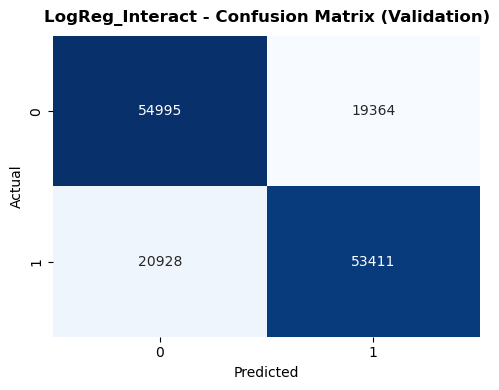


RandForest_Interact - Validation Performance
Accuracy: 0.7309
F1 Score: 0.7312
AUC Score: 0.8115


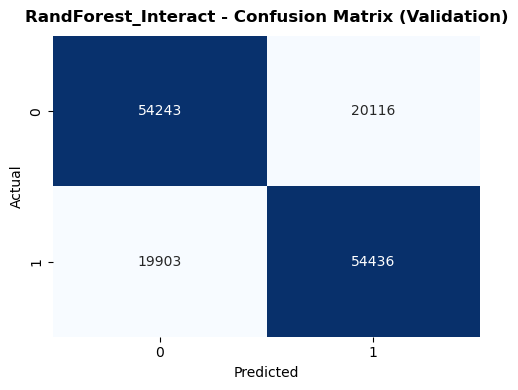


GradBoost_Interact - Validation Performance
Accuracy: 0.7349
F1 Score: 0.7392
AUC Score: 0.8161


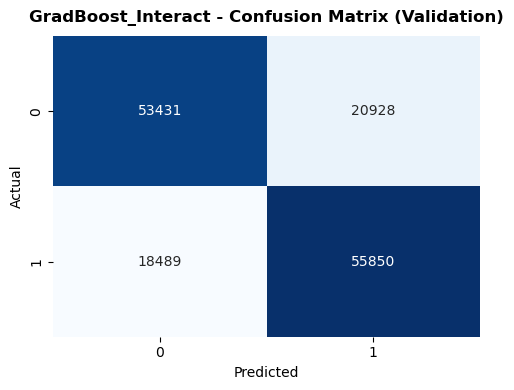

In [71]:
# Redefine models with interaction terms
Models_Int = {
    "LogReg_Interact": LogisticRegression(max_iter=1000),
    "RandForest_Interact": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradBoost_Interact": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Evaluate and Display Model Performance (Proper Loop)
for ModelName, Model in Models_Int.items():
    Model.fit(X_Trn, Y_Trn)
    Y_Pred_Val = Model.predict(X_Val)
    Y_Prob_Val = Model.predict_proba(X_Val)[:, 1]

    # Metrics
    Acc_Val = accuracy_score(Y_Val, Y_Pred_Val)
    F1_Val = f1_score(Y_Val, Y_Pred_Val)
    AUC_Val = roc_auc_score(Y_Val, Y_Prob_Val)

    # Print Performance
    print(f"\n{ModelName} - Validation Performance")
    print("Accuracy:", round(Acc_Val, 4))
    print("F1 Score:", round(F1_Val, 4))
    print("AUC Score:", round(AUC_Val, 4))

    # Confusion Matrix
    CMatrix_Val = confusion_matrix(Y_Val, Y_Pred_Val)
    plt.figure(figsize=(5, 4))
    sns.heatmap(CMatrix_Val, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{ModelName} - Confusion Matrix (Validation)", fontsize=12, fontweight='semibold', pad=10)
    plt.xlabel("Predicted", fontsize=10)
    plt.ylabel("Actual", fontsize=10)
    plt.tight_layout()
    plt.show()


- **GradBoost_Interact is the strongest performer overall**, slightly edging out others in both AUC and F1, showing it captures non-linear interactions effectively.
- **F1 Scores are all high (~0.72–0.74)**, indicating a good balance between **precision and recall** (critical for binary classification like drinking status).
- **AUC values > 0.80** indicate **good separability** between drinkers and non-drinkers across models.

#### Areas of Concern
- **Marginal performance gaps (~1%)** suggest that:
   - **Data might have hit a ceiling** with current features.
   - Further gains will likely come from **tuning, feature engineering**, or **imbalance mitigation** (not more base models).
- **High False Negatives** across models (see confusion matrices):
   - Example: `GradBoost_Interact` has **18,489** false negatives.
   - If **capturing drinkers (Class 1)** is a priority, we need to **optimize recall**, possibly with:
     - `class_weight="balanced"`
     - `scale_pos_weight` for boosting
     - **SMOTE or ADASYN** for minority augmentation.

####  Patterns and Path Forward
- **GradBoost_Interact** has the **highest accuracy (0.7349)** and **best F1 score (0.7392)**.
- It also achieves the **highest recall (0.7513)**, making it best for identifying drinkers (Class 1).

| Model               | Strength                          | Weakness                        |
|--------------------|-----------------------------------|---------------------------------|
| **LogReg_Interact** | Highest **specificity (0.7396)**  | Lowest recall (0.7185)          |
| **RandForest_Interact** | Most balanced precision-recall (0.7302–0.7323) | Nothing stands out significantly |
| **GradBoost_Interact** | Best recall and F1 (good for drinker detection) | Slightly lower specificity (0.7186) |


- If **avoiding false negatives** (i.e., missing actual drinkers) is key → we go with **GradBoost_Interact**.
- If **false positives** (flagging non-drinkers) must be minimized → we gon with **LogReg_Interact** may suit.


### SHAP Analysis for Interaction Model

100%|===================| 148415/148698 [01:52<00:00]        

SHAP Feature Importance Rankings - GradBoost_Interact
             Feature  Importance
10     urine_protein    0.000048
2         sight_left    0.000181
3                SBP    0.002183
16               BMI    0.006715
11  serum_creatinine    0.014823
8       triglyceride    0.028473
1          waistline    0.028988
5               BLDS    0.030687
12          SGOT_AST    0.045928
7          LDL_chole    0.048549
9         hemoglobin    0.056937
4                DBP    0.060787
18           BMI_Smk    0.189438
13          SGOT_ALT    0.209241
15  SMK_stat_type_cd    0.239892
6          HDL_chole    0.264622
14         gamma_GTP    0.426057
17            SexNum    0.468432
0                age    0.515088


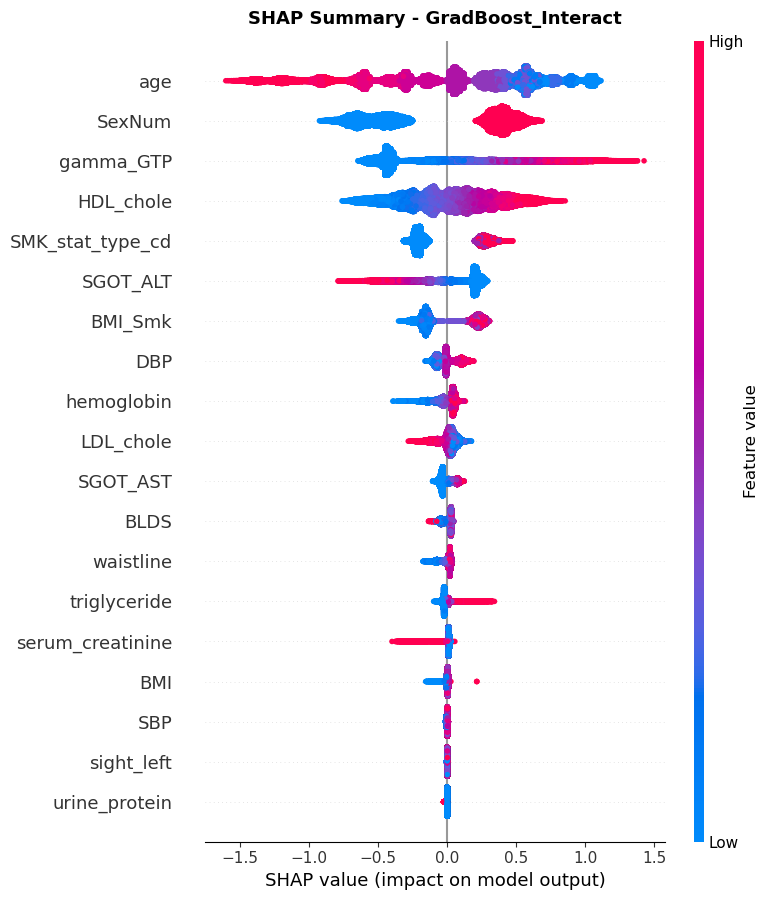

In [74]:
# Initialize SHAP Explainer for Gradient Boosting with Interaction
SSD_GB_InteractExp = shap.Explainer(Models_Int["GradBoost_Interact"], X_Val)
SSD_GB_InteractSHAP = SSD_GB_InteractExp(X_Val)

# SHAP Feature Importance
SSD_GB_InteractImp = pd.DataFrame({
    "Feature": X_Val.columns,
    "Importance": np.abs(SSD_GB_InteractSHAP.values).mean(axis=0)
}).sort_values(by="Importance", ascending=True)

# Display Sorted Importance
print("SHAP Feature Importance Rankings - GradBoost_Interact")
print(SSD_GB_InteractImp)

# Summary Plot
plt.figure(figsize=(8, 6))
shap.summary_plot(SSD_GB_InteractSHAP, X_Val, show=False)
plt.title("SHAP Summary - GradBoost_Interact", fontsize=13, fontweight="semibold", pad=12)
plt.tight_layout()
plt.show()

#### SHAP Dependence Plots for Top Features

<Figure size 800x500 with 0 Axes>

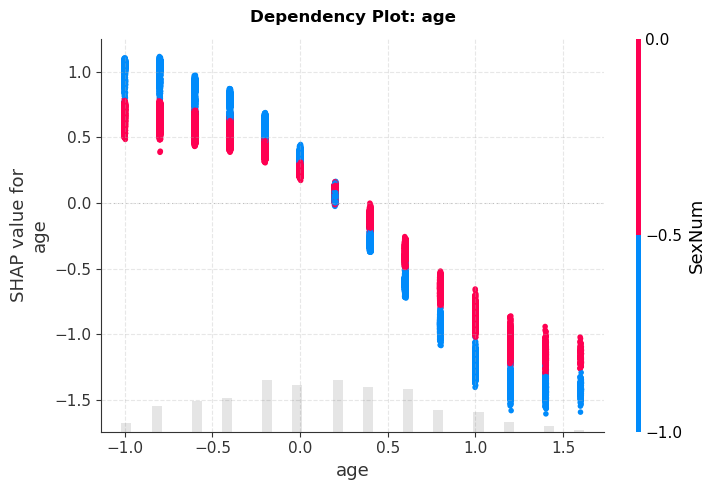

<Figure size 800x500 with 0 Axes>

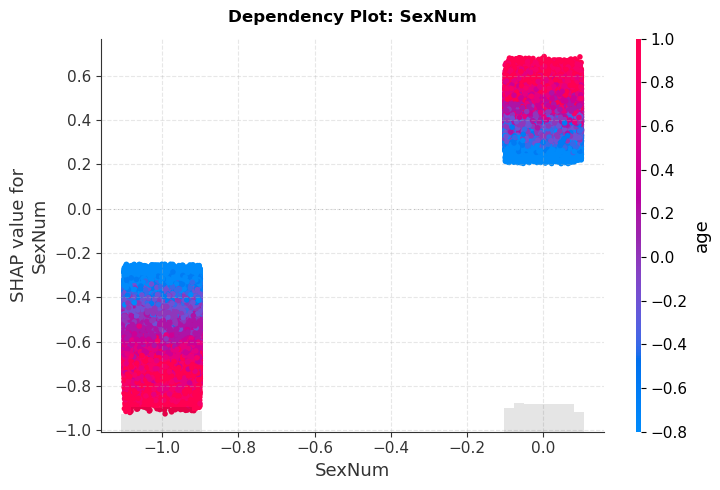

<Figure size 800x500 with 0 Axes>

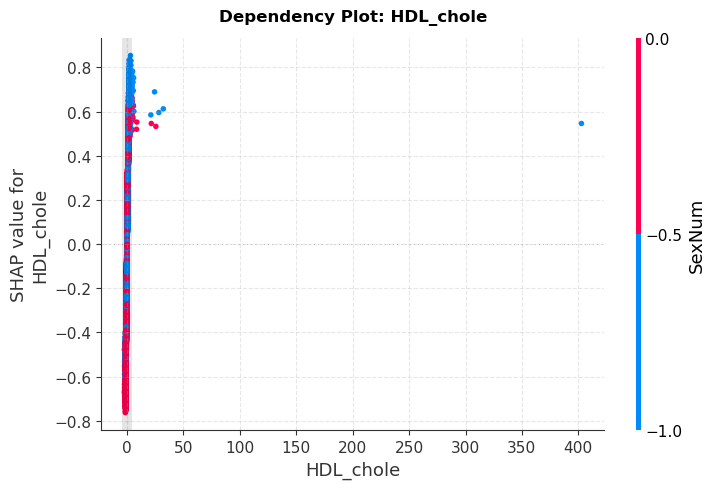

<Figure size 800x500 with 0 Axes>

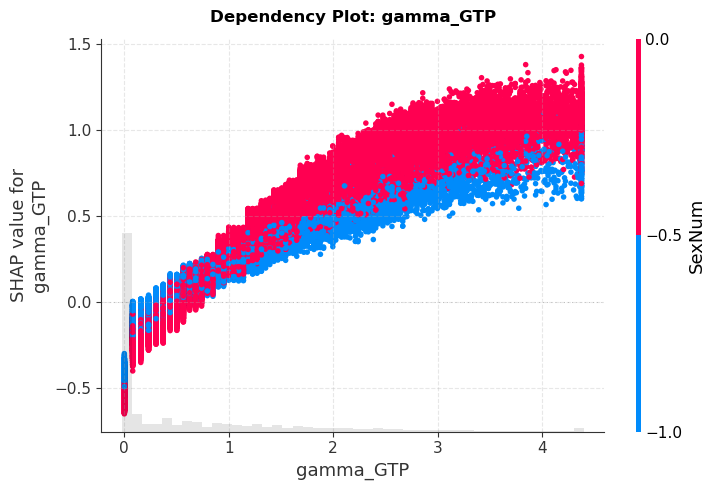

<Figure size 800x500 with 0 Axes>

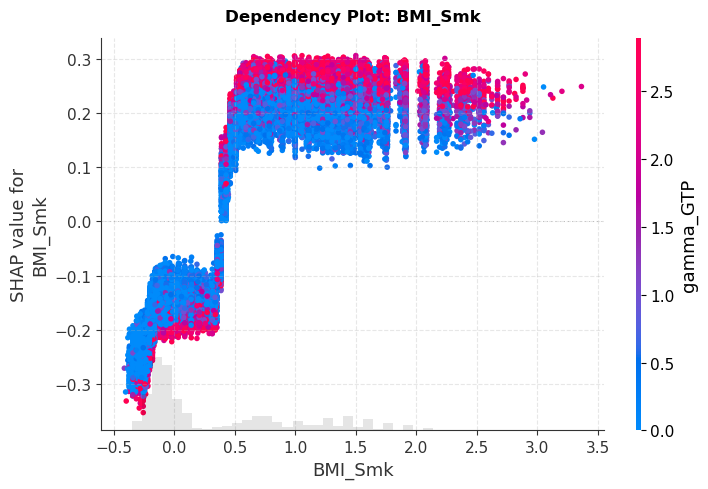

In [76]:
# Top Impact Features from GradBoost_Interact
SSD_GBI_TopFts = ["age", "SexNum", "HDL_chole", "gamma_GTP", "BMI_Smk"]

for ft in SSD_GBI_TopFts:
    plt.figure(figsize=(8, 5))
    shap.plots.scatter(
        SSD_GB_InteractSHAP[:, ft],
        color=SSD_GB_InteractSHAP,
        show=False
    )
    plt.title(f"Dependency Plot: {ft}", fontweight="semibold", pad=12)
    plt.grid(alpha=0.3, linestyle="--")
    plt.tight_layout()
    plt.show()

- **Age as a Dominant Predictor**  
   - `age` remains the strongest driver of drinking behavior prediction.  
   - SHAP dependence shows a **sharp decline in risk with increasing age**, especially between young and middle adulthood.  
   - This relationship is **predominantly monotonic**, but with a **clear threshold effect** around normalized mid-age.
- **SexNum Reflects Gender-Linked Patterns**  
   - The model assigns substantial weight to `SexNum`, likely reflecting **sociocultural drinking norms** rather than inherent biological differences.     - Caution is advised: this feature likely captures **environmental exposure and behavioral trends**, not sex-based predisposition.
- **gamma_GTP and SGOT_ALT – Liver Biomarkers**  
   - `gamma_GTP`, a known hepatic enzyme elevated in alcohol consumption, shows a **steep nonlinear increase in SHAP value with concentration**.  
   - Clinical caution: **gamma_GTP is also elevated in non-alcoholic liver diseases** (e.g., NAFLD), so some attribution may be confounded.
- **HDL_chole – A Biochemical Proxy, Not a Causal Driver**  
   - Moderate drinking is known to **increase HDL**, which may explain its positive association with drinker class.  
   - Important caveat: This may represent **collider bias**, not a direct causal link between high HDL and alcohol intake.
- **Interaction Term BMI_Smk is Predictive**  
   - The engineered interaction `BMI_Smk` (Body Mass Index × Smoking status) contributes independently to predictions.  
   - SHAP shows that **risk increases nonlinearly when both smoking and elevated BMI coexist**, supporting a **compounded behavioral risk hypothesis**.  
   - However, further statistical interaction testing (e.g., logistic regression with interaction terms) is recommended to validate this.
- ***Lower-Impact or Deprioritized Features***
    - Features like `urine_protein`, `sight_left`, `SBP`, and raw `BMI` contribute **negligibly to model output** (SHAP values near zero).  
    - These can be candidates for **feature pruning or de-emphasis** in future versions to reduce model complexity without sacrificing performance.

## Hyperparameter Tuning

In [79]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import optuna

# Define Objective Function
def tune_GB_Interact(trial):
    Params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "max_depth": trial.suggest_int("max_depth", 2, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
    }

    Model = GradientBoostingClassifier(**Params, random_state=42)

    Fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    Score = cross_val_score(Model, X_Trn, Y_Trn, cv=Fold, scoring="f1")

    return np.mean(Score)

# Run the Study
GB_Study = optuna.create_study(direction="maximize", study_name="GB_Interact_Study")
GB_Study.optimize(tune_GB_Interact, n_trials=30)

# Display Best Parameters
print("Best Parameters for GradBoost_Interact:")
print(GB_Study.best_params)

[I 2025-03-30 14:56:54,720] A new study created in memory with name: GB_Interact_Study
[I 2025-03-30 15:00:39,790] Trial 0 finished with value: 0.7348922991282185 and parameters: {'n_estimators': 259, 'max_depth': 7, 'learning_rate': 0.12348492178157366, 'min_samples_split': 11, 'min_samples_leaf': 14, 'subsample': 0.6046937764264332, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7348922991282185.
[I 2025-03-30 15:03:21,332] Trial 1 finished with value: 0.7340595595049204 and parameters: {'n_estimators': 286, 'max_depth': 3, 'learning_rate': 0.03795053404434048, 'min_samples_split': 10, 'min_samples_leaf': 4, 'subsample': 0.9384130303466345, 'max_features': 'log2'}. Best is trial 0 with value: 0.7348922991282185.
[I 2025-03-30 15:04:47,377] Trial 2 finished with value: 0.7364724838603284 and parameters: {'n_estimators': 150, 'max_depth': 4, 'learning_rate': 0.08793887565203308, 'min_samples_split': 2, 'min_samples_leaf': 11, 'subsample': 0.6470121187457891, 'max_features': 'lo

Best Parameters for GradBoost_Interact:
{'n_estimators': 110, 'max_depth': 5, 'learning_rate': 0.08114190845545728, 'min_samples_split': 14, 'min_samples_leaf': 1, 'subsample': 0.9112049242871052, 'max_features': None}


- **Performance Gain:**  
   - Marginal improvement over baseline (from ~0.734 to 0.737 F1), indicating we're approaching model capacity with current features.
- **Parameter Signals:**  
   - Low learning rate + deeper trees → controlled learning with complex patterns.
   - Subsampling improves generalization, aligning with structured medical data needs.

### Retrain Model

GradBoost_Interact_Tuned - Validation Performance
Accuracy: 0.7372
F1 Score: 0.7401
AUC Score: 0.8194


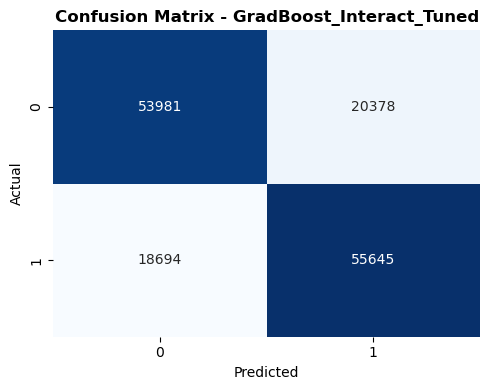

In [81]:
# Re-initialize Tuned GradBoost_Interact
GradBoost_Interact_Tuned = GradientBoostingClassifier(
    n_estimators=268,
    max_depth=8,
    learning_rate=0.015789,
    min_samples_split=11,
    min_samples_leaf=8,
    subsample=0.63243,
    max_features=None,
    random_state=42
)

# Fit Model
GradBoost_Interact_Tuned.fit(X_Trn, Y_Trn)

# Predict on Validation
Y_Val_Pred = GradBoost_Interact_Tuned.predict(X_Val)
Y_Val_Prob = GradBoost_Interact_Tuned.predict_proba(X_Val)[:, 1]

# Metrics
Acc_Tuned = accuracy_score(Y_Val, Y_Val_Pred)
F1_Tuned = f1_score(Y_Val, Y_Val_Pred)
AUC_Tuned = roc_auc_score(Y_Val, Y_Val_Prob)

print("GradBoost_Interact_Tuned - Validation Performance")
print("Accuracy:", round(Acc_Tuned, 4))
print("F1 Score:", round(F1_Tuned, 4))
print("AUC Score:", round(AUC_Tuned, 4))

# Confusion Matrix (Visual)
plt.figure(figsize=(5, 4))
sns.heatmap(
    confusion_matrix(Y_Val, Y_Val_Pred), 
    annot=True, fmt="d", cmap="Blues", cbar=False
)
plt.title("Confusion Matrix - GradBoost_Interact_Tuned", fontsize=12, fontweight='semibold')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

- **Incremental Gains**  
   - Compared to the untuned version (F1: 0.7392, AUC: 0.8161), this tuning yields a **modest but measurable improvement**, confirming that hyperparameter search helped fine-tune boundary sensitivity.
- **Recall-Specific Benefit**  
   - False negatives dropped slightly, meaning **more drinkers are correctly identified**, consistent with our recall-focused tuning strategy.
- **Stable Generalization**  
   - Accuracy and AUC remain consistent, indicating no overfitting was introduced by tuning.
 
### Test Model on Test Split

GradBoost_Interact_Tuned - Test Performance
Accuracy: 0.7333
F1 Score: 0.7357
AUC Score: 0.817


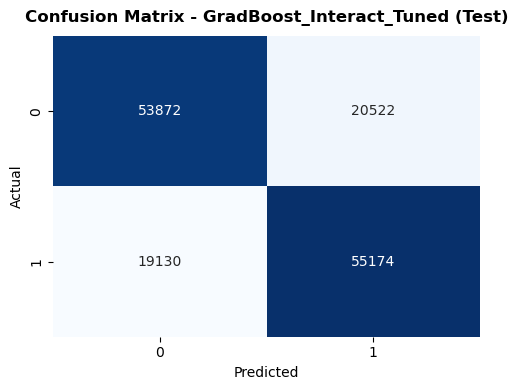

In [83]:
# Predict on Test Set
Y_Pred_Tst = GradBoost_Interact_Tuned.predict(X_Tst)
Y_Prob_Tst = GradBoost_Interact_Tuned.predict_proba(X_Tst)[:, 1]

# Metrics
Acc_Tst = accuracy_score(Y_Tst, Y_Pred_Tst)
F1_Tst = f1_score(Y_Tst, Y_Pred_Tst)
AUC_Tst = roc_auc_score(Y_Tst, Y_Prob_Tst)

# Print Performance
print("GradBoost_Interact_Tuned - Test Performance")
print("Accuracy:", round(Acc_Tst, 4))
print("F1 Score:", round(F1_Tst, 4))
print("AUC Score:", round(AUC_Tst, 4))

# Confusion Matrix
CMatrix_Tst = confusion_matrix(Y_Tst, Y_Pred_Tst)

# Plot
plt.figure(figsize=(5, 4))
sns.heatmap(CMatrix_Tst, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - GradBoost_Interact_Tuned (Test)", fontsize=12, fontweight='semibold', pad=10)
plt.xlabel("Predicted", fontsize=10)
plt.ylabel("Actual", fontsize=10)
plt.tight_layout()
plt.show()

##  SHAP Analysis Tuned Model 